----------------------------
# Data Dictionary
---------------------------
SO_2: sulphur dioxide level measured in μg/m³. 

CO: carbon monoxide level measured in mg/m³. 

NO: nitric oxide level measured in μg/m³.

NO_2: nitrogen dioxide level measured in μg/m³.

PM25: particles smaller than 2.5 μm level measured in μg/m³.

PM10: particles smaller than 10 μm level measured in μg/m³.

NOx: nitrous oxides level measured in μg/m³. 

O_3: ozone level measured in μg/m³. 

TOL: toluene (methylbenzene) level measured in μg/m³.

BEN: benzene level measured in μg/m³.

EBE: ethylbenzene level measured in μg/m³.

MXY: m-xylene level measured in μg/m³. 

PXY: p-xylene level measured in μg/m³. 

OXY: o-xylene level measured in μg/m³.

TCH: total hydrocarbons level measured in mg/m³.

CH4: methane level measured in mg/m³. 

NMHC: non-methane hydrocarbons (volatile organic compounds) level measured in mg/m³. 

--------------------------------------------

In [1]:
# CO (mg/m³), TCH (mg/m³), CH4 (mg/m³), NMHC (mg/m³)

In [2]:
# import all libraries to be used for the analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.ticker as ticker

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Gathering the Data

**Since our data has the same column, we use the concat method to combine the dataframes into one mamaster dataframe.**

In [3]:
# let's read the the different 18 datasets
df_2001 = pd.read_csv('madrid_2001.csv')
df_2002 = pd.read_csv('madrid_2002.csv')
df_2003 = pd.read_csv('madrid_2003.csv')
df_2004 = pd.read_csv('madrid_2004.csv')
df_2005 = pd.read_csv('madrid_2005.csv')
df_2006 = pd.read_csv('madrid_2006.csv')
df_2007 = pd.read_csv('madrid_2007.csv')
df_2008 = pd.read_csv('madrid_2008.csv')
df_2009 = pd.read_csv('madrid_2009.csv')
df_2010 = pd.read_csv('madrid_2010.csv')
df_2011 = pd.read_csv('madrid_2011.csv')
df_2012 = pd.read_csv('madrid_2012.csv')
df_2013 = pd.read_csv('madrid_2013.csv')
df_2014 = pd.read_csv('madrid_2014.csv')
df_2015 = pd.read_csv('madrid_2015.csv')
df_2016 = pd.read_csv('madrid_2016.csv')
df_2017 = pd.read_csv('madrid_2017.csv')
df_2018 = pd.read_csv('madrid_2018.csv')

In [4]:
# compile the list of dataframes you want to merge
merged_data = [df_2001, df_2002, df_2003, df_2004, df_2005, df_2006, df_2007, df_2008, df_2009, df_2010, df_2011,
               df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018]
nan_value = 0

In [5]:
#madrid_data = pd.concat(merged_data, join='outer', axis=1).fillna(nan_value)

In [6]:
# merge all the individual datasets
madrid_data = pd.concat(merged_data)

In [7]:
# convert the merged data to a dataframe and save to a csv file
pd.DataFrame.to_csv(madrid_data, 'madrid_master', index=False)

# Assessing the Data

In [8]:
# Load and display our master dataset
madrid_master = pd.read_csv('madrid_master')

# Looking at the first five rows p
madrid_master.head()

date  BEN    CO   EBE  MXY  NMHC       NO_2        NOx  \
0  2001-08-01 01:00:00  NaN  0.37   NaN  NaN   NaN  58.400002  87.150002   
1  2001-08-01 01:00:00  1.5  0.34  1.49  4.1  0.07  56.250000  75.169998   
2  2001-08-01 01:00:00  NaN  0.28   NaN  NaN   NaN  50.660000  61.380001   
3  2001-08-01 01:00:00  NaN  0.47   NaN  NaN   NaN  69.790001  73.449997   
4  2001-08-01 01:00:00  NaN  0.39   NaN  NaN   NaN  22.830000  24.799999   

    OXY        O_3        PM10   PXY  SO_2   TCH    TOL   station  PM25  NO  \
0   NaN  34.529999  105.000000   NaN  6.34   NaN    NaN  28079001   NaN NaN   
1  2.11  42.160000  100.599998  1.73  8.11  1.24  10.82  28079035   NaN NaN   
2   NaN  46.310001  100.099998   NaN  7.85   NaN    NaN  28079003   NaN NaN   
3   NaN  40.650002   69.779999   NaN  6.46   NaN    NaN  28079004   NaN NaN   
4   NaN  66.309998   75.180000   NaN  8.80   NaN    NaN  28079039   NaN NaN   

   CH4  
0  NaN  
1  NaN  
2  NaN  
3  NaN  
4  NaN

In [9]:
# looking at the last five rows of our dataset
madrid_master.tail()

date  BEN   CO  EBE  MXY  NMHC   NO_2    NOx  OXY  \
3808219  2018-02-01 00:00:00  NaN  0.5  NaN  NaN   NaN   91.0  192.0  NaN   
3808220  2018-02-01 00:00:00  NaN  0.7  NaN  NaN   NaN  107.0  241.0  NaN   
3808221  2018-02-01 00:00:00  NaN  NaN  NaN  NaN   NaN   48.0   91.0  NaN   
3808222  2018-02-01 00:00:00  NaN  NaN  NaN  NaN   NaN  103.0  320.0  NaN   
3808223  2018-02-01 00:00:00  NaN  NaN  NaN  NaN   NaN   96.0  202.0  NaN   

         O_3  PM10  PXY  SO_2  TCH  TOL   station  PM25     NO  CH4  
3808219  1.0  35.0  NaN   NaN  NaN  NaN  28079056  22.0   66.0  NaN  
3808220  NaN  29.0  NaN  15.0  NaN  NaN  28079057   NaN   87.0  NaN  
3808221  2.0   NaN  NaN   NaN  NaN  NaN  28079058   NaN   28.0  NaN  
3808222  2.0   NaN  NaN   NaN  NaN  NaN  28079059   NaN  141.0  NaN  
3808223  3.0  26.0  NaN   NaN  NaN  NaN  28079060   NaN   69.0  NaN

In [10]:
# checking the number of rows and columns in our dataset
madrid_master.shape

(3808224, 19)

In [11]:
# checking the statistical descriptionof our dataset
madrid_master.describe()

BEN            CO           EBE            MXY          NMHC  \
count  1.041684e+06  2.651012e+06  1.001724e+06  315415.000000  1.085312e+06   
mean   1.257431e+00  5.503838e-01  1.407927e+00       4.650394  1.873865e-01   
std    1.910831e+00  5.354483e-01  2.146109e+00       5.599223  1.539529e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000  0.000000e+00   
25%    2.100000e-01  2.600000e-01  3.500000e-01       1.200000  9.000000e-02   
50%    6.000000e-01  4.000000e-01  8.800000e-01       2.800000  1.500000e-01   
75%    1.500000e+00  6.500000e-01  1.580000e+00       5.890000  2.400000e-01   
max    6.639000e+01  1.804000e+01  1.622000e+02     177.600006  9.070000e+00   

               NO_2           NOx            OXY           O_3          PM10  \
count  3.787050e+06  2.376275e+06  315695.000000  2.991732e+06  2.861255e+06   
mean   5.047151e+01  1.093188e+02       2.280912  3.982616e+01  2.893654e+01   
std    3.455288e+01  1.102871e+02       2.639609  3.039249e+01  2.594859e+01   
min    0.000000e+00  0.000000e+00       0.000000  0.000000e+00  0.000000e+00   
25%    2.400000e+01  4.000000e+01       0.960000  1.271000e+01  1.150000e+01   
50%    4.400000e+01  7.615000e+01       1.320000  3.486000e+01  2.149000e+01   
75%    6.958000e+01  1.397000e+02       2.740000  5.999000e+01  3.775000e+01   
max    6.286000e+02  2.537000e+03     103.000000  2.360000e+02  6.950000e+02   

                 PXY          SO_2           TCH           TOL       station  \
count  315584.000000  2.775960e+06  1.086441e+06  1.038929e+06  3.808224e+06   
mean        2.056178  1.065539e+01  1.435882e+00  5.876842e+00  2.807903e+07   
std         2.395130  9.121267e+00  2.332228e-01  8.524460e+00  2.028574e+01   
min         0.000000  0.000000e+00  0.000000e+00  0.000000e+00  2.807900e+07   
25%         0.800000  5.840000e+00  1.300000e+00  1.100000e+00  2.807901e+07   
50%         1.280000  8.150000e+00  1.380000e+00  3.160000e+00  2.807902e+07   
75%         2.510000  1.230000e+01  1.510000e+00  6.990000e+00  2.807904e+07   
max       106.000000  1.991000e+02  1.048000e+01  2.429000e+02  2.807910e+07   

                PM25            NO           CH4  
count  816424.000000  1.532397e+06  14850.000000  
mean       13.738292  2.343886e+01      1.300849  
std        11.214146  5.021504e+01      0.195550  
min       -31.000000  0.000000e+00      0.020000  
25%         6.450000  2.000000e+00      1.170000  
50%        11.000000  6.000000e+00      1.250000  
75%        17.670000  2.000000e+01      1.400000  
max       506.899994  1.146000e+03      3.920000

In [12]:
# looking at the information of our dataset
madrid_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3808224 entries, 0 to 3808223
Data columns (total 19 columns):
 #   Column   Dtype  
---  ------   -----  
 0   date     object 
 1   BEN      float64
 2   CO       float64
 3   EBE      float64
 4   MXY      float64
 5   NMHC     float64
 6   NO_2     float64
 7   NOx      float64
 8   OXY      float64
 9   O_3      float64
 10  PM10     float64
 11  PXY      float64
 12  SO_2     float64
 13  TCH      float64
 14  TOL      float64
 15  station  int64  
 16  PM25     float64
 17  NO       float64
 18  CH4      float64
dtypes: float64(17), int64(1), object(1)
memory usage: 552.0+ MB


In [13]:
# getting the missing values in our dataset and assigning to a variable num_missing_df
num_missing = madrid_master.isnull().mean().round(2) * 100
num_missing_df = pd.DataFrame(num_missing, columns=['missing values'])
num_missing_df

missing values
date                0.0
BEN                73.0
CO                 30.0
EBE                74.0
MXY                92.0
NMHC               72.0
NO_2                1.0
NOx                38.0
OXY                92.0
O_3                21.0
PM10               25.0
PXY                92.0
SO_2               27.0
TCH                71.0
TOL                73.0
station             0.0
PM25               79.0
NO                 60.0
CH4               100.0

In [14]:
# checking for duplicate rows in our dataset
madrid_master.duplicated().sum()

0

# Data Dictionary

 - id: the staion ID.
 

 - name: the name of the station.
 

 - address: the address of the station.
 

 - lat: Longitude measurement of the station.
 
 Latitude of place is a geographical coordinate that determines the "north-south position" on the surface of the earth. Its value ranges from 0 degree at the "equator to 90 degree" at "North and South poles". It measured in degress, minutes, and seconds.
 

 - lon: Longitude measurement of the station.
 
 Lines of longitude, also called meridians, are imaginary lines that divide the Earth. They run north to south from pole to pole, but they measure the distance east or west. It measured in degress, minutes, and seconds.
 

 - Elevation: The elevation of a geographic location is its height above or below sea level

In [15]:
# load and display our stations dataset
stations = pd.read_csv('stations.csv')

# looking at the first five rows of our dataset
stations.head()

id                 name  \
0  28079004       Pza. de España   
1  28079008     Escuelas Aguirre   
2  28079011  Avda. Ramón y Cajal   
3  28079016         Arturo Soria   
4  28079017           Villaverde   

                                             address       lon        lat  \
0                                    Plaza de España -3.712247  40.423853   
1                    Entre C/ Alcalá y C/ O’ Donell  -3.682319  40.421564   
2   Avda. Ramón y Cajal  esq. C/ Príncipe de Vergara -3.677356  40.451475   
3  C/ Arturo Soria  esq. C/  Vizconde de los Asilos  -3.639233  40.440047   
4                                  C/. Juan Peñalver -3.713322  40.347139   

   elevation  
0        635  
1        670  
2        708  
3        693  
4        604

In [16]:
# looking at the last five rows of our dataset
stations.tail()

id                    name  \
19  28079056  Pza. Fernández Ladreda   
20  28079057             Sanchinarro   
21  28079058                El Pardo   
22  28079059           Juan Carlos I   
23  28079060             Tres Olivos   

                                              address       lon        lat  \
19              Pza. Fernández Ladreda - Avda. Oporto -3.718728  40.384964   
20            C/ Princesa de Eboli esq C/ Maria Tudor -3.660503  40.494208   
21                                   Avda. La Guardia -3.774611  40.518058   
22  Parque Juan Carlos I (frente oficinas mantenim... -3.609072  40.465250   
23                                 Plaza Tres Olivos  -3.689761  40.500589   

    elevation  
19        604  
20        700  
21        615  
22        660  
23        715

In [17]:
# checking the number of rows and columns in our dataset
stations.shape

(24, 6)

In [18]:
# looking at the statistical description of our dataset
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         24 non-null     int64  
 1   name       24 non-null     object 
 2   address    24 non-null     object 
 3   lon        24 non-null     float64
 4   lat        24 non-null     float64
 5   elevation  24 non-null     int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 1.2+ KB


#### Quality Issues

 - missing values in out dataset. i.e Columns like (BEN, EBE, MXY, NMHC, OXY, PXY, TCH, TOL, PM25, CH4) all have more than 70% of missing values.
 
 
 - Erroneous datatype (date column is of object data type) instead of datetime.
 
 
 - Inconsistent unit of measurement for CO column. Its unit of measurement should be in μg/m³ instead of mg/m³.
 
 
 - The column names `id` for the stations table, and the coulmn name `station` for the madrid_clean table aren't uniform. The both columns should be remaned station_id for uniformity.
 
 
 - The station_id columns are in madrid_clean and stations tables are in int instead of string.
 
 
 - redundant address column in the stations table.

 #### Tidiness issues
 
 
  - different information information (time, year, month, and day) in the date column of the madrid_clean dataframe.
  
 
  - stations table should be merged with the madrid_master table, since they already have a common column which is the `station_id`. This would also aid our visualization and modelling.

# Cleaning the Data

In this section, clean all of the issues you documented while assessing.

**Note**: Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [19]:
# making the copies of the datasets to preserve the original datasets
madrid_clean = madrid_master.copy()
stations_clean = stations.copy()

### issue #1

missing values in out dataset. i.e Columns like (BEN, EBE, MXY, NMHC, OXY, PXY, TCH, TOL, PM25, CH4) all have more than 70% of missing values.

### define

These features will be dropped. This is because the amount of know data points remaining in these columns are insignificant compared the the number that has been deleted.

### code

In [20]:
# let's look at the percentages of missing values again
misssing_percent= madrid_clean.isnull().mean().round(2) * 100
misssing_percent_df = pd.DataFrame(misssing_percent, columns=['missing values'])
misssing_percent_df

missing values
date                0.0
BEN                73.0
CO                 30.0
EBE                74.0
MXY                92.0
NMHC               72.0
NO_2                1.0
NOx                38.0
OXY                92.0
O_3                21.0
PM10               25.0
PXY                92.0
SO_2               27.0
TCH                71.0
TOL                73.0
station             0.0
PM25               79.0
NO                 60.0
CH4               100.0

In [21]:
# removing features with more than 70% misssing values
drop_list = ['BEN', 'BEN', 'EBE', 'MXY', 'NMHC', 'OXY', 'PXY', 'TCH', 'TOL', 'PM25', 'CH4']

# drp the columns
madrid_clean.drop(drop_list, axis=1, inplace=True)

### test

In [22]:
# checking if our cleaning effort worked
madrid_clean.head()

date    CO       NO_2        NOx        O_3        PM10  \
0  2001-08-01 01:00:00  0.37  58.400002  87.150002  34.529999  105.000000   
1  2001-08-01 01:00:00  0.34  56.250000  75.169998  42.160000  100.599998   
2  2001-08-01 01:00:00  0.28  50.660000  61.380001  46.310001  100.099998   
3  2001-08-01 01:00:00  0.47  69.790001  73.449997  40.650002   69.779999   
4  2001-08-01 01:00:00  0.39  22.830000  24.799999  66.309998   75.180000   

   SO_2   station  NO  
0  6.34  28079001 NaN  
1  8.11  28079035 NaN  
2  7.85  28079003 NaN  
3  6.46  28079004 NaN  
4  8.80  28079039 NaN

In [23]:
# replace missing values in the remaining columns with the median

madrid_clean['CO'].fillna(madrid_clean['CO'].median(), inplace = True)
madrid_clean['NO_2'].fillna(madrid_clean['NO_2'].median(), inplace = True)
madrid_clean['NOx'].fillna(madrid_clean['NOx'].median(), inplace = True)
madrid_clean['O_3'].fillna(madrid_clean['O_3'].median(), inplace = True)
madrid_clean['PM10'].fillna(madrid_clean['PM10'].median(), inplace = True)
madrid_clean['SO_2'].fillna(madrid_clean['SO_2'].median(), inplace = True)
madrid_clean['NO'].fillna(madrid_clean['NO'].median(), inplace = True)

### test

In [24]:
# checking if the missing values have been replaced with medians
madrid_clean.head()

date    CO       NO_2        NOx        O_3        PM10  \
0  2001-08-01 01:00:00  0.37  58.400002  87.150002  34.529999  105.000000   
1  2001-08-01 01:00:00  0.34  56.250000  75.169998  42.160000  100.599998   
2  2001-08-01 01:00:00  0.28  50.660000  61.380001  46.310001  100.099998   
3  2001-08-01 01:00:00  0.47  69.790001  73.449997  40.650002   69.779999   
4  2001-08-01 01:00:00  0.39  22.830000  24.799999  66.309998   75.180000   

   SO_2   station   NO  
0  6.34  28079001  6.0  
1  8.11  28079035  6.0  
2  7.85  28079003  6.0  
3  6.46  28079004  6.0  
4  8.80  28079039  6.0

### issue #2

Erroneous datatype (date column is of object data type) instead of datetime.

### define

Covert the datatype of data column to datetime

### code

In [25]:
# converting date from object to datetime data type
madrid_clean['date'] = pd.to_datetime(madrid_clean['date'], infer_datetime_format=True)

### test

In [26]:
# checking if our cleaning effort worked
madrid_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3808224 entries, 0 to 3808223
Data columns (total 9 columns):
 #   Column   Dtype         
---  ------   -----         
 0   date     datetime64[ns]
 1   CO       float64       
 2   NO_2     float64       
 3   NOx      float64       
 4   O_3      float64       
 5   PM10     float64       
 6   SO_2     float64       
 7   station  int64         
 8   NO       float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 261.5 MB


### issue #3

Inconsistent unit of measurement for CO column. Its unit of measurement should be in μg/m³ instead of mg/m³.

### define

Change the the unit measurement of CO to μg/m³. To do this, we divide by 1000.

### code

In [27]:
# Notice the values of CO before we make the change
madrid_clean.head()

date    CO       NO_2        NOx        O_3        PM10  \
0 2001-08-01 01:00:00  0.37  58.400002  87.150002  34.529999  105.000000   
1 2001-08-01 01:00:00  0.34  56.250000  75.169998  42.160000  100.599998   
2 2001-08-01 01:00:00  0.28  50.660000  61.380001  46.310001  100.099998   
3 2001-08-01 01:00:00  0.47  69.790001  73.449997  40.650002   69.779999   
4 2001-08-01 01:00:00  0.39  22.830000  24.799999  66.309998   75.180000   

   SO_2   station   NO  
0  6.34  28079001  6.0  
1  8.11  28079035  6.0  
2  7.85  28079003  6.0  
3  6.46  28079004  6.0  
4  8.80  28079039  6.0

In [28]:
# Initiating measurement uniformity
madrid_clean['CO'] = madrid_clean['CO']/1000

### test

In [29]:
madrid_clean.head()

date       CO       NO_2        NOx        O_3        PM10  \
0 2001-08-01 01:00:00  0.00037  58.400002  87.150002  34.529999  105.000000   
1 2001-08-01 01:00:00  0.00034  56.250000  75.169998  42.160000  100.599998   
2 2001-08-01 01:00:00  0.00028  50.660000  61.380001  46.310001  100.099998   
3 2001-08-01 01:00:00  0.00047  69.790001  73.449997  40.650002   69.779999   
4 2001-08-01 01:00:00  0.00039  22.830000  24.799999  66.309998   75.180000   

   SO_2   station   NO  
0  6.34  28079001  6.0  
1  8.11  28079035  6.0  
2  7.85  28079003  6.0  
3  6.46  28079004  6.0  
4  8.80  28079039  6.0

### issue #4

The column names `id` for the stations table, and the coulmn name `station` for the madrid_clean table aren't uniform. The both columns should be remaned station_id for uniformity.

### define

Rename both the `id` column of the station table and the `station` column in the madrid_master to `station_id`, so that both column names can be uniform since they contain the same information on the station ids.

### code

In [30]:
madrid_clean.rename(columns={'station': 'station_id'}, inplace=True)
stations.rename(columns={'id': 'station_id'}, inplace=True)

### test

In [31]:
madrid_clean.head()

date       CO       NO_2        NOx        O_3        PM10  \
0 2001-08-01 01:00:00  0.00037  58.400002  87.150002  34.529999  105.000000   
1 2001-08-01 01:00:00  0.00034  56.250000  75.169998  42.160000  100.599998   
2 2001-08-01 01:00:00  0.00028  50.660000  61.380001  46.310001  100.099998   
3 2001-08-01 01:00:00  0.00047  69.790001  73.449997  40.650002   69.779999   
4 2001-08-01 01:00:00  0.00039  22.830000  24.799999  66.309998   75.180000   

   SO_2  station_id   NO  
0  6.34    28079001  6.0  
1  8.11    28079035  6.0  
2  7.85    28079003  6.0  
3  6.46    28079004  6.0  
4  8.80    28079039  6.0

In [32]:
stations.head()

station_id                 name  \
0    28079004       Pza. de España   
1    28079008     Escuelas Aguirre   
2    28079011  Avda. Ramón y Cajal   
3    28079016         Arturo Soria   
4    28079017           Villaverde   

                                             address       lon        lat  \
0                                    Plaza de España -3.712247  40.423853   
1                    Entre C/ Alcalá y C/ O’ Donell  -3.682319  40.421564   
2   Avda. Ramón y Cajal  esq. C/ Príncipe de Vergara -3.677356  40.451475   
3  C/ Arturo Soria  esq. C/  Vizconde de los Asilos  -3.639233  40.440047   
4                                  C/. Juan Peñalver -3.713322  40.347139   

   elevation  
0        635  
1        670  
2        708  
3        693  
4        604

### issue #5

The station_id columns are in madrid_clean and stations tables are in int instead of string.

### define

convert the station_id for both tables to strings. Reason: the values aren't going to be used for analysis, even though they are numeric.

### code

In [33]:
madrid_clean['station_id'] = madrid_clean['station_id'].astype(str)
stations['station_id'] = stations['station_id'].astype(str)

### test

In [34]:
madrid_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3808224 entries, 0 to 3808223
Data columns (total 9 columns):
 #   Column      Dtype         
---  ------      -----         
 0   date        datetime64[ns]
 1   CO          float64       
 2   NO_2        float64       
 3   NOx         float64       
 4   O_3         float64       
 5   PM10        float64       
 6   SO_2        float64       
 7   station_id  object        
 8   NO          float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 261.5+ MB


In [35]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   station_id  24 non-null     object 
 1   name        24 non-null     object 
 2   address     24 non-null     object 
 3   lon         24 non-null     float64
 4   lat         24 non-null     float64
 5   elevation   24 non-null     int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 1.2+ KB


### issue #6

Redundant address column in the stations table or dataframe.

### define

drop the address column from the stations table as it won't be relevant for our analysis.

### code

In [36]:
stations.drop(['address'], axis=1, inplace=True)

### test

In [37]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   station_id  24 non-null     object 
 1   name        24 non-null     object 
 2   lon         24 non-null     float64
 3   lat         24 non-null     float64
 4   elevation   24 non-null     int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 1.1+ KB


### issue #7

Different information (time, year, month, day) in the date column of the madrid_clean dataframe.

### define

Extract the time, year, month, and day from the date column.

### code

In [38]:
madrid_clean['date'] = pd.to_datetime(madrid_clean['date']).dt.date
madrid_clean['time'] = pd.to_datetime(madrid_clean['date']).dt.time

madrid_clean['year'] = pd.to_datetime(madrid_clean['date']).dt.year
madrid_clean['month'] = pd.to_datetime(madrid_clean['date']).dt.month_name()
madrid_clean['day'] = pd.to_datetime(madrid_clean['date']).dt.day_name()

### test

In [39]:
# checking to see if the columns has been extracted and added
madrid_clean.head()

date       CO       NO_2        NOx        O_3        PM10  SO_2  \
0  2001-08-01  0.00037  58.400002  87.150002  34.529999  105.000000  6.34   
1  2001-08-01  0.00034  56.250000  75.169998  42.160000  100.599998  8.11   
2  2001-08-01  0.00028  50.660000  61.380001  46.310001  100.099998  7.85   
3  2001-08-01  0.00047  69.790001  73.449997  40.650002   69.779999  6.46   
4  2001-08-01  0.00039  22.830000  24.799999  66.309998   75.180000  8.80   

  station_id   NO      time  year   month        day  
0   28079001  6.0  00:00:00  2001  August  Wednesday  
1   28079035  6.0  00:00:00  2001  August  Wednesday  
2   28079003  6.0  00:00:00  2001  August  Wednesday  
3   28079004  6.0  00:00:00  2001  August  Wednesday  
4   28079039  6.0  00:00:00  2001  August  Wednesday

In [40]:
# checking the datatypes of the columns
madrid_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3808224 entries, 0 to 3808223
Data columns (total 13 columns):
 #   Column      Dtype  
---  ------      -----  
 0   date        object 
 1   CO          float64
 2   NO_2        float64
 3   NOx         float64
 4   O_3         float64
 5   PM10        float64
 6   SO_2        float64
 7   station_id  object 
 8   NO          float64
 9   time        object 
 10  year        int64  
 11  month       object 
 12  day         object 
dtypes: float64(7), int64(1), object(5)
memory usage: 377.7+ MB


In [41]:
# Convert date, time and year column to datetime
madrid_clean['date'] = pd.to_datetime(madrid_clean['date'])

In [42]:
madrid_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3808224 entries, 0 to 3808223
Data columns (total 13 columns):
 #   Column      Dtype         
---  ------      -----         
 0   date        datetime64[ns]
 1   CO          float64       
 2   NO_2        float64       
 3   NOx         float64       
 4   O_3         float64       
 5   PM10        float64       
 6   SO_2        float64       
 7   station_id  object        
 8   NO          float64       
 9   time        object        
 10  year        int64         
 11  month       object        
 12  day         object        
dtypes: datetime64[ns](1), float64(7), int64(1), object(4)
memory usage: 377.7+ MB


In [43]:
madrid_clean.head()

date       CO       NO_2        NOx        O_3        PM10  SO_2  \
0 2001-08-01  0.00037  58.400002  87.150002  34.529999  105.000000  6.34   
1 2001-08-01  0.00034  56.250000  75.169998  42.160000  100.599998  8.11   
2 2001-08-01  0.00028  50.660000  61.380001  46.310001  100.099998  7.85   
3 2001-08-01  0.00047  69.790001  73.449997  40.650002   69.779999  6.46   
4 2001-08-01  0.00039  22.830000  24.799999  66.309998   75.180000  8.80   

  station_id   NO      time  year   month        day  
0   28079001  6.0  00:00:00  2001  August  Wednesday  
1   28079035  6.0  00:00:00  2001  August  Wednesday  
2   28079003  6.0  00:00:00  2001  August  Wednesday  
3   28079004  6.0  00:00:00  2001  August  Wednesday  
4   28079039  6.0  00:00:00  2001  August  Wednesday

In [44]:
madrid_clean.isnull().sum()

date          0
CO            0
NO_2          0
NOx           0
O_3           0
PM10          0
SO_2          0
station_id    0
NO            0
time          0
year          0
month         0
day           0
dtype: int64

### issue #8

The month and Day columns are in string or object datatypes.

### define

Convert the month and day columns to categorical data types

### code

In [45]:
# list of the month names
month_names= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
            'November', 'December']

# Returns the types for sedan_classes with the categories and orderliness
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
months = pd.api.types.CategoricalDtype(ordered=True, categories=month_names)

# Use pandas.astype() to convert the "month" column from a plain object type to an ordered categorical type
madrid_clean['month'] = madrid_clean['month'].astype(months);

In [46]:
# list of the day names
day_names= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Returns the types for sedan_classes with the categories and orderliness
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
days = pd.api.types.CategoricalDtype(ordered=True, categories=day_names)

# Use pandas.astype() to convert the "month" column from a plain object type to an ordered categorical type
madrid_clean['day'] = madrid_clean['day'].astype(days);

### test

In [47]:
madrid_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3808224 entries, 0 to 3808223
Data columns (total 13 columns):
 #   Column      Dtype         
---  ------      -----         
 0   date        datetime64[ns]
 1   CO          float64       
 2   NO_2        float64       
 3   NOx         float64       
 4   O_3         float64       
 5   PM10        float64       
 6   SO_2        float64       
 7   station_id  object        
 8   NO          float64       
 9   time        object        
 10  year        int64         
 11  month       category      
 12  day         category      
dtypes: category(2), datetime64[ns](1), float64(7), int64(1), object(2)
memory usage: 326.9+ MB


### issue #9

stations table should be merged with the madrid_clean table, since they already have a common column which is the station_id. This would also aid our visualization and modelling.

### define

Merge stations table or dataframe to the madrid_clean table on  the station_id column.

### code

In [48]:
# just taking a look at our madrid_clean dataframe once again
madrid_clean.head()

date       CO       NO_2        NOx        O_3        PM10  SO_2  \
0 2001-08-01  0.00037  58.400002  87.150002  34.529999  105.000000  6.34   
1 2001-08-01  0.00034  56.250000  75.169998  42.160000  100.599998  8.11   
2 2001-08-01  0.00028  50.660000  61.380001  46.310001  100.099998  7.85   
3 2001-08-01  0.00047  69.790001  73.449997  40.650002   69.779999  6.46   
4 2001-08-01  0.00039  22.830000  24.799999  66.309998   75.180000  8.80   

  station_id   NO      time  year   month        day  
0   28079001  6.0  00:00:00  2001  August  Wednesday  
1   28079035  6.0  00:00:00  2001  August  Wednesday  
2   28079003  6.0  00:00:00  2001  August  Wednesday  
3   28079004  6.0  00:00:00  2001  August  Wednesday  
4   28079039  6.0  00:00:00  2001  August  Wednesday

In [49]:
# just taking a look at our stations dataframe once again
stations.head()

station_id                 name       lon        lat  elevation
0   28079004       Pza. de España -3.712247  40.423853        635
1   28079008     Escuelas Aguirre -3.682319  40.421564        670
2   28079011  Avda. Ramón y Cajal -3.677356  40.451475        708
3   28079016         Arturo Soria -3.639233  40.440047        693
4   28079017           Villaverde -3.713322  40.347139        604

In [50]:
print(madrid_clean.shape)
print(stations.shape)

(3808224, 13)
(24, 5)


In [51]:
# merge the stations dataframe to the madrid_clean dataframe
Data = pd.merge(madrid_clean, stations, on='station_id', how='left')
Data.head()

date       CO       NO_2        NOx        O_3        PM10  SO_2  \
0 2001-08-01  0.00037  58.400002  87.150002  34.529999  105.000000  6.34   
1 2001-08-01  0.00034  56.250000  75.169998  42.160000  100.599998  8.11   
2 2001-08-01  0.00028  50.660000  61.380001  46.310001  100.099998  7.85   
3 2001-08-01  0.00047  69.790001  73.449997  40.650002   69.779999  6.46   
4 2001-08-01  0.00039  22.830000  24.799999  66.309998   75.180000  8.80   

  station_id   NO      time  year   month        day              name  \
0   28079001  6.0  00:00:00  2001  August  Wednesday               NaN   
1   28079035  6.0  00:00:00  2001  August  Wednesday   Pza. del Carmen   
2   28079003  6.0  00:00:00  2001  August  Wednesday               NaN   
3   28079004  6.0  00:00:00  2001  August  Wednesday    Pza. de España   
4   28079039  6.0  00:00:00  2001  August  Wednesday  Barrio del Pilar   

        lon        lat  elevation  
0       NaN        NaN        NaN  
1 -3.703172  40.419208      659.0  
2       NaN        NaN        NaN  
3 -3.712247  40.423853      635.0  
4 -3.711542  40.478228      674.0

In [52]:
Data.shape

(3808224, 17)

We could observe from the dataframe that some rows has missing values in their name, lon, lat, elevation columns.

If we remember, the information from the Kaggle site stated that the master dataframe which is the stations.csv file contains only 24 active stations that had equipment for measurements during those years. Some of the other stations were said to have ceased activity.

This means that each of the csv files for the different years before they were merged into one dataframe actually contains stations that were not active, and those stations weren't included in the 24 stations in the csv file.

In [53]:
# now let's check the numnber of stations in our dataframe using the station ids
Data['station_id'].unique()

array(['28079001', '28079035', '28079003', '28079004', '28079039',
       '28079006', '28079007', '28079009', '28079038', '28079011',
       '28079012', '28079040', '28079014', '28079015', '28079016',
       '28079018', '28079019', '28079036', '28079021', '28079022',
       '28079023', '28079024', '28079025', '28079099', '28079017',
       '28079008', '28079026', '28079027', '28079057', '28079058',
       '28079054', '28079059', '28079047', '28079049', '28079050',
       '28079055', '28079056', '28079060', '28079048'], dtype=object)

We could see that we have more than 24 stations, which means we need to delete the stations that were present in the madrid_clean dataframe, but weren't present in the stations.csv file before it was merged with the madrid_clean dataframe.

Since these stations do not have their names recorded in the stations dataframe before merging, we can extract rows with NaN values in the name column and then drop them.

In [54]:
Data[Data['name'].isna()]

date       CO        NO_2         NOx        O_3        PM10  \
0       2001-08-01  0.00037   58.400002   87.150002  34.529999  105.000000   
2       2001-08-01  0.00028   50.660000   61.380001  46.310001  100.099998   
5       2001-08-01  0.00063   66.260002  118.099998  33.500000  122.699997   
6       2001-08-01  0.00028   35.799999   39.590000  68.250000  124.900002   
7       2001-08-01  0.00067   74.830002  112.000000  26.410000  113.000000   
...            ...      ...         ...         ...        ...         ...   
2268819 2010-07-31  0.00038   64.050003   79.410004  69.790001   52.169998   
2268820 2010-07-31  0.00058  110.400002  124.500000  31.900000   21.490000   
2268841 2010-07-31  0.00050   86.809998  112.699997  49.549999   54.360001   
2268842 2010-08-01  0.00043   85.220001   89.809998  47.279999   21.490000   
2268863 2010-08-01  0.00043   76.330002   88.190002  52.259998   47.150002   

          SO_2 station_id   NO      time  year   month        day name  lon  \
0         6.34   28079001  6.0  00:00:00  2001  August  Wednesday  NaN  NaN   
2         7.85   28079003  6.0  00:00:00  2001  August  Wednesday  NaN  NaN   
5         6.36   28079006  6.0  00:00:00  2001  August  Wednesday  NaN  NaN   
6         5.23   28079007  6.0  00:00:00  2001  August  Wednesday  NaN  NaN   
7        11.61   28079009  6.0  00:00:00  2001  August  Wednesday  NaN  NaN   
...        ...        ...  ...       ...   ...     ...        ...  ...  ...   
2268819   6.97   28079099  6.0  00:00:00  2010    July   Saturday  NaN  NaN   
2268820   7.88   28079003  6.0  00:00:00  2010    July   Saturday  NaN  NaN   
2268841   7.12   28079099  6.0  00:00:00  2010    July   Saturday  NaN  NaN   
2268842   7.59   28079003  6.0  00:00:00  2010  August     Sunday  NaN  NaN   
2268863   7.03   28079099  6.0  00:00:00  2010  August     Sunday  NaN  NaN   

         lat  elevation  
0        NaN        NaN  
2        NaN        NaN  
5        NaN        NaN  
6        NaN        NaN  
7        NaN        NaN  
...      ...        ...  
2268819  NaN        NaN  
2268820  NaN        NaN  
2268841  NaN        NaN  
2268842  NaN        NaN  
2268863  NaN        NaN  

[1146240 rows x 17 columns]

In [55]:
# we could also check to confirm that these rows with missing values in the name column also have missing values in their
# lon, lat and elevation columns

Data.isnull().sum()

date                0
CO                  0
NO_2                0
NOx                 0
O_3                 0
PM10                0
SO_2                0
station_id          0
NO                  0
time                0
year                0
month               0
day                 0
name          1146240
lon           1146240
lat           1146240
elevation     1146240
dtype: int64

In [56]:
# Now, let's drop these rows with missing values in the name, and their corresponding lon, lat and elevation columns.
Data.dropna(inplace=True)

In [57]:
Data.head()

date       CO       NO_2        NOx        O_3        PM10   SO_2  \
1 2001-08-01  0.00034  56.250000  75.169998  42.160000  100.599998   8.11   
3 2001-08-01  0.00047  69.790001  73.449997  40.650002   69.779999   6.46   
4 2001-08-01  0.00039  22.830000  24.799999  66.309998   75.180000   8.80   
8 2001-08-01  0.00041  33.209999  37.299999  62.299999  125.300003  10.87   
9 2001-08-01  0.00017  24.129999  36.970001  46.200001   95.589996   3.89   

  station_id   NO      time  year   month        day                 name  \
1   28079035  6.0  00:00:00  2001  August  Wednesday      Pza. del Carmen   
3   28079004  6.0  00:00:00  2001  August  Wednesday       Pza. de España   
4   28079039  6.0  00:00:00  2001  August  Wednesday     Barrio del Pilar   
8   28079038  6.0  00:00:00  2001  August  Wednesday       Cuatro Caminos   
9   28079011  6.0  00:00:00  2001  August  Wednesday  Avda. Ramón y Cajal   

        lon        lat  elevation  
1 -3.703172  40.419208      659.0  
3 -3.712247  40.423853      635.0  
4 -3.711542  40.478228      674.0  
8 -3.707128  40.445544      698.0  
9 -3.677356  40.451475      708.0

In [58]:
# checking the number of rows and columns in the dataframe
Data.shape

(2661984, 17)

In [59]:
# making sure the features all has the correct data types
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2661984 entries, 1 to 3808223
Data columns (total 17 columns):
 #   Column      Dtype         
---  ------      -----         
 0   date        datetime64[ns]
 1   CO          float64       
 2   NO_2        float64       
 3   NOx         float64       
 4   O_3         float64       
 5   PM10        float64       
 6   SO_2        float64       
 7   station_id  object        
 8   NO          float64       
 9   time        object        
 10  year        int64         
 11  month       category      
 12  day         category      
 13  name        object        
 14  lon         float64       
 15  lat         float64       
 16  elevation   float64       
dtypes: category(2), datetime64[ns](1), float64(10), int64(1), object(3)
memory usage: 330.0+ MB


### What is the structure of this dataset?

They were initially 3808224 rows of different of records for different stations but after combining the dataset that contains the information of the different elements, with the dataset that contains the information about the different active stations, I realized that some stations which weren't part of the active stations were present in the combined dataframe, and I had to drop these rows.

### What is the main features of interest in this dataset?

I am most interested in finding out:


 - How the different gas levels changed with increase in years.
 
 
 - which months did the level of these gases rise the most.
 
  
  - How the different gases correlate with their levels.
  
  
  - How the levels interpolate between the location of the stations.
  
  
  - if some gases more common at different elevations.
  
  
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The main features that I think would help me gather the above mentioned insights are the year, month, lat, lon, elevation, and station name columns. I expect the level of the gases to rise more during the dry season (months) time.

# Exploratory Data Analysis

## Univariate Analysis

### Numerical Variables

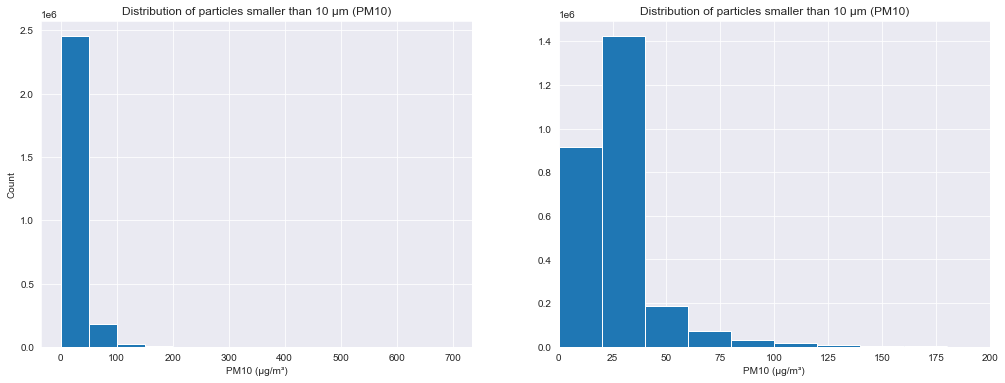

In [60]:
# start with a standard-scaled plot
plt.figure(figsize=[17, 6])

plt.subplot(1,2,1)
binsize = 50
bins = np.arange(0, Data['PM10'].max()+binsize, binsize)
plt.hist(data = Data, x = 'PM10', bins = bins);
plt.title('Distribution of particles smaller than 10 μm (PM10)');
plt.xlabel('PM10 (μg/m³)')
plt.ylabel('Count')


# specifying axis limit to help us confirm where the peak falls
plt.subplot(1,2,2)
binsize = 20
bins = np.arange(0, Data['PM10'].max()+binsize, binsize)
plt.hist(data = Data, x = 'PM10', bins=bins)
plt.title('Distribution of particles smaller than 10 μm (PM10)');
plt.xlabel('PM10 (μg/m³)')
plt.xlim([0, 200]);

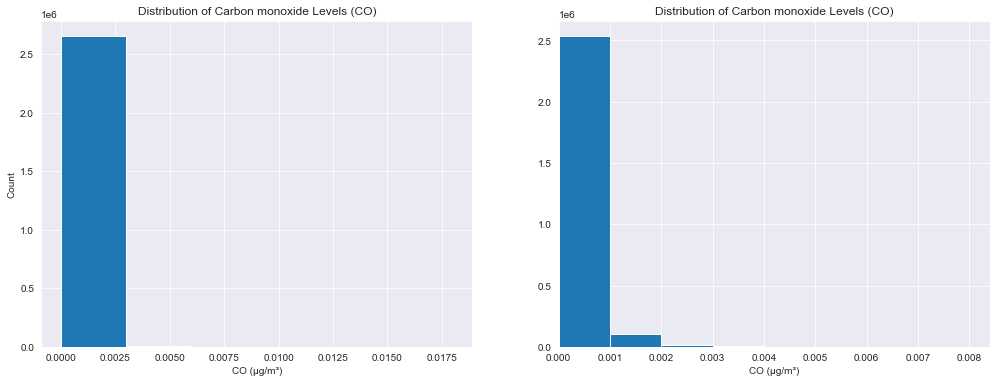

In [61]:
# start with a standard-scaled plot

plt.figure(figsize=[17, 6])

plt.subplot(1,2,1)
binsize = 0.003
bins = np.arange(0, Data['CO'].max()+binsize, binsize)
plt.hist(data = Data, x = 'CO', bins = bins);
plt.title('Distribution of Carbon monoxide Levels (CO)');
plt.xlabel('CO (μg/m³)')
plt.ylabel('Count')


# specifying axis limit to help us confirm where the peak falls
plt.subplot(1,2,2)
binsize = 0.001
bins = np.arange(0, Data['CO'].max()+binsize, binsize)
plt.hist(data = Data, x = 'CO', bins=bins)
plt.title('Distribution of Carbon monoxide Levels (CO)');
plt.xlabel('CO (μg/m³)')
plt.xlim([0, 0.0084]);

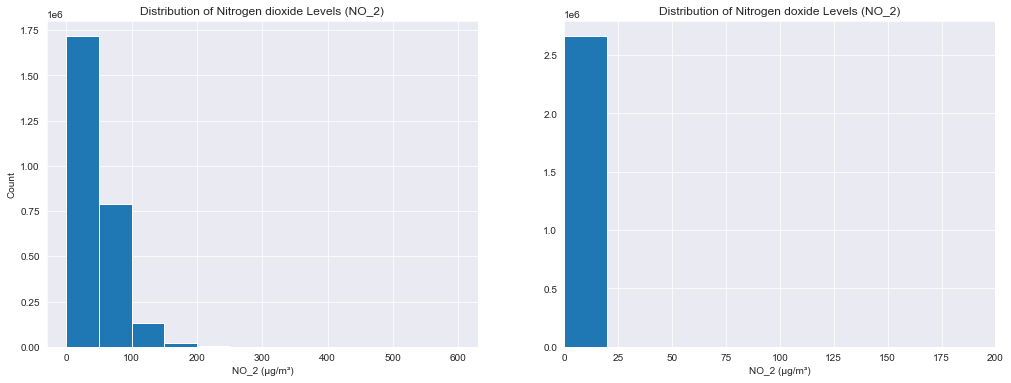

In [62]:
# start with a standard-scaled plot
plt.figure(figsize=[17, 6])

plt.subplot(1,2,1)
binsize = 50
bins = np.arange(0, Data['NO_2'].max()+binsize, binsize)
plt.hist(data = Data, x = 'NO_2', bins = bins);
plt.title('Distribution of Nitrogen dioxide Levels (NO_2)');
plt.xlabel('NO_2 (μg/m³)')
plt.ylabel('Count')


# specifying axis limit to help us confirm where the peak falls
plt.subplot(1,2,2)
binsize = 20
bins = np.arange(0, Data['NO_2'].max()+binsize, binsize)
plt.hist(data = Data, x = 'CO', bins=bins)
plt.title('Distribution of Nitrogen doxide Levels (NO_2)');
plt.xlabel('NO_2 (μg/m³)')
plt.xlim([0, 200]);

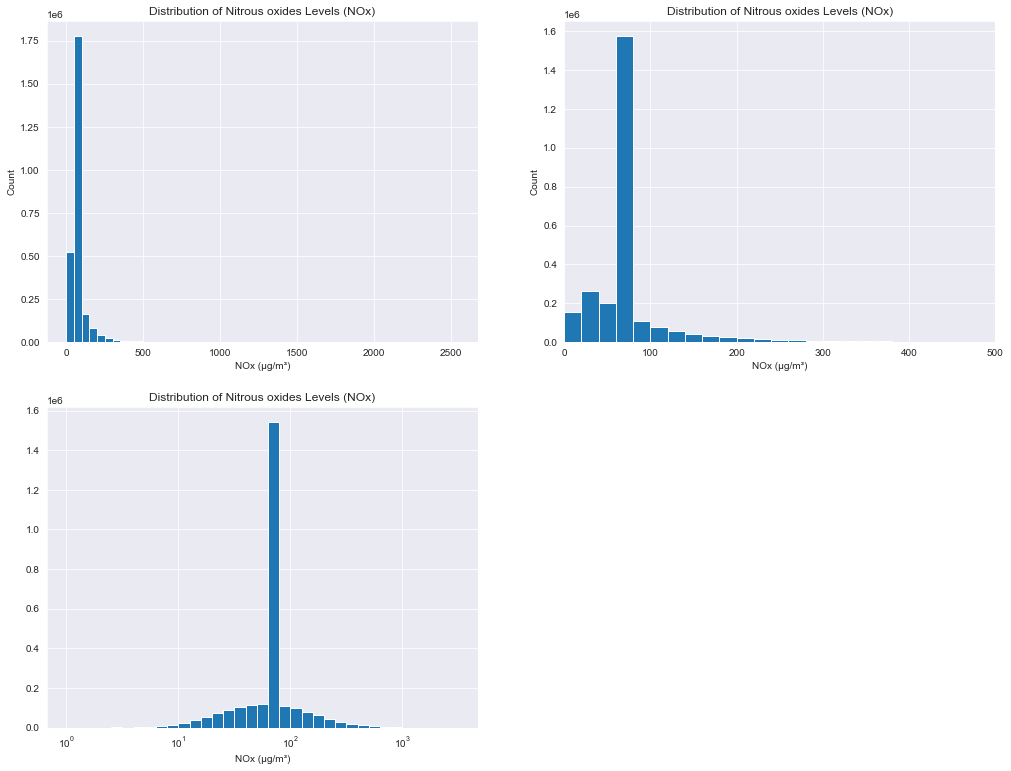

In [63]:
# start with a standard-scaled plot
plt.figure(figsize=[17, 13])

plt.subplot(2,2,1)
binsize = 50
bins = np.arange(0, Data['NOx'].max()+binsize, binsize)
plt.hist(data = Data, x = 'NOx', bins = bins);
plt.title('Distribution of Nitrous oxides Levels (NOx)');
plt.xlabel('NOx (μg/m³)')
plt.ylabel('Count')


# specifying axis limit to help us confirm where the peak falls
plt.subplot(2,2,2)
binsize = 20
bins = np.arange(0, Data['NOx'].max()+binsize, binsize)
plt.hist(data = Data, x = 'NOx', bins=bins)
plt.title('Distribution of Nitrous oxides Levels (NOx)');
plt.xlim([0, 500]);
plt.xlabel('NOx (μg/m³)')
plt.ylabel('Count');


# there's a long tail in the distribution, so let's put it on a log scale instead
plt.subplot(2,2,3)
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(Data['NOx'].max())+log_binsize, log_binsize)
ticks =[0.1, 0.3, 1, 3, 10, 30, 100, 300, 500, 1000, 1500, 2000, 2500]
label = ['{}'.format(v) for v in ticks]
plt.hist(data = Data, x = 'NOx', bins=bins)
plt.xscale('log')
plt.title('Distribution of Nitrous oxides Levels (NOx)');
plt.xlabel('NOx (μg/m³)');

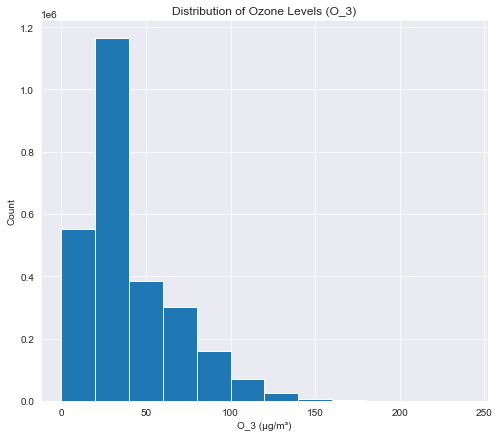

In [64]:
# plot with a standard-scaled plot
plt.figure(figsize=[8, 7])

binsize = 20
bins = np.arange(0, Data['O_3'].max()+binsize, binsize)
plt.hist(data = Data, x = 'O_3', bins = bins);
plt.title('Distribution of Ozone Levels (O_3)');
plt.xlabel('O_3 (μg/m³)')
plt.ylabel('Count');

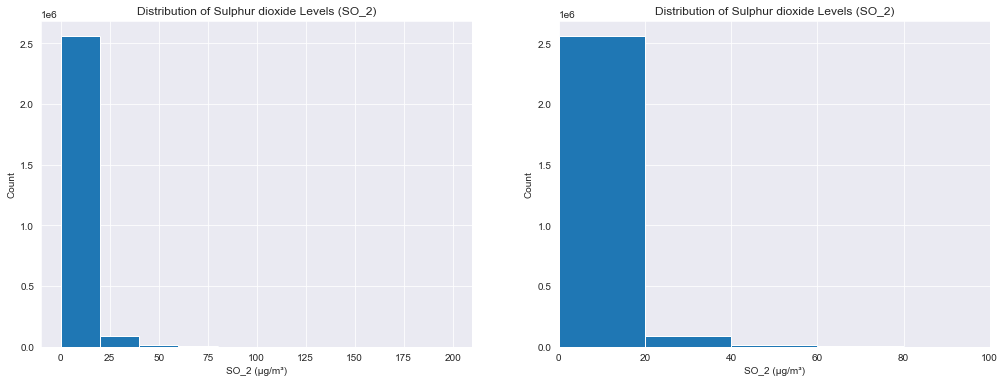

In [65]:
# plot with a standard-scaled plot
plt.figure(figsize=[17, 6])

plt.subplot(1,2,1)
binsize = 20
bins = np.arange(0, Data['SO_2'].max()+binsize, binsize)
plt.hist(data = Data, x = 'SO_2', bins = bins);
plt.title('Distribution of Sulphur dioxide Levels (SO_2)');
plt.xlabel('SO_2 (μg/m³)')
plt.ylabel('Count');

# specifying axis limit to help us confirm where the peak falls
plt.subplot(1,2,2)
binsize = 20
bins = np.arange(0, Data['SO_2'].max()+binsize, binsize)
plt.hist(data = Data, x = 'SO_2', bins=bins)
plt.xlim([0, 100]);
plt.title('Distribution of Sulphur dioxide Levels (SO_2)');
plt.xlabel('SO_2 (μg/m³)')
plt.ylabel('Count');

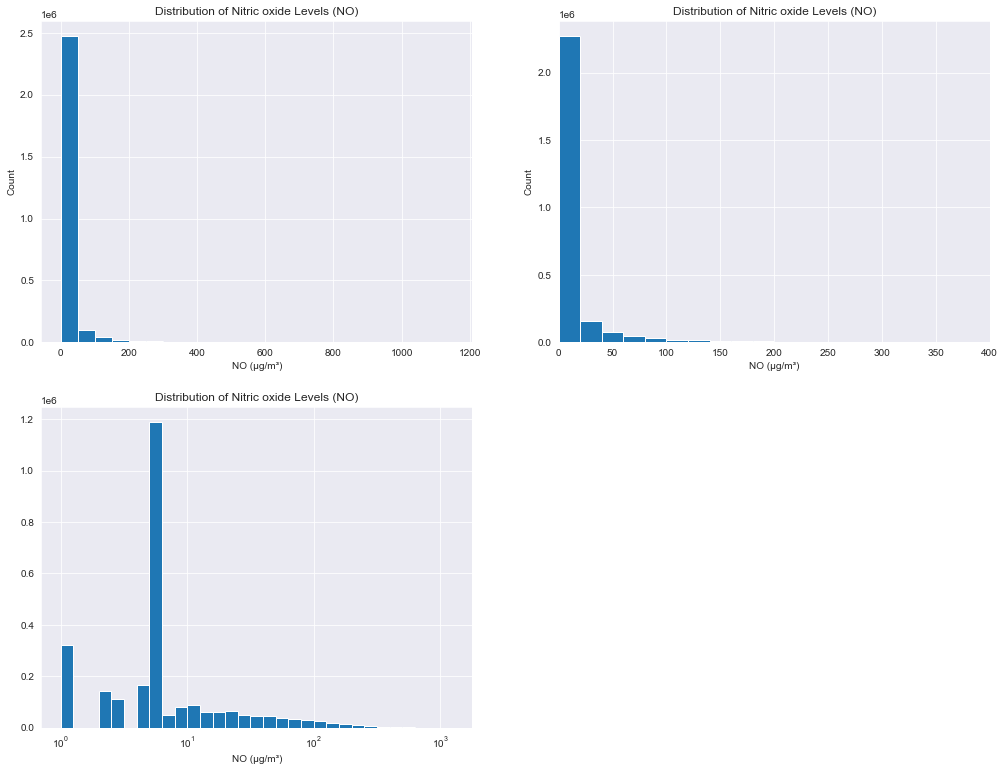

In [66]:
# start with a standard-scaled plot
plt.figure(figsize=[17, 13])

plt.subplot(2,2,1)
binsize = 50
bins = np.arange(0, Data['NO'].max()+binsize, binsize)
plt.hist(data = Data, x = 'NO', bins = bins);
plt.title('Distribution of Nitric oxide Levels (NO)');
plt.xlabel('NO (μg/m³)')
plt.ylabel('Count')


# specifying axis limit to help us confirm where the peak falls
plt.subplot(2,2,2)
binsize = 20
bins = np.arange(0, Data['NO'].max()+binsize, binsize)
plt.hist(data = Data, x = 'NO', bins=bins)
plt.title('Distribution of Nitric oxide Levels (NO)');
plt.xlim([0, 400]);
plt.xlabel('NO (μg/m³)')
plt.ylabel('Count');


# there's a long tail in the distribution, so let's put it on a log scale instead
plt.subplot(2,2,3)
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(Data['NO'].max())+log_binsize, log_binsize)
ticks =[0.1, 0.3, 1, 3, 10, 30, 100, 300, 500, 1000, 1200]
label = ['{}'.format(v) for v in ticks]
plt.hist(data = Data, x = 'NO', bins=bins)
plt.xscale('log')
plt.title('Distribution of Nitric oxide Levels (NO)');
plt.xlabel('NO (μg/m³)');

In the histogram chart above, we can see that all the elements were skewed to the right, leaving most data points concentrationg on the left, and mostly between 0 to 20 microgram per meter cube (μg/m³).

Elements like Nitrogen dioxide `(NO_2)` and Ozone `(O_3)` had their peaks at 70 to 80 and 20 to 40 microgram per meter cube (μg/m³) respectively. PM10 (particles smaller than 10 μm `(PM10)` laso had its peak at 20 to 40 μg/m³.

### Categorical Variables

In [67]:
# creating a function to create a countplot into a subplot for a given category variable

color = sns.color_palette()[0]
def count_plot(cat):
    if cat == 'year':
        sns.countplot(data=Data, x = cat, color=color)
        plt.xlabel('Year')
        plt.ylabel('Count')
        plt.title('Year Distribution According to Number of Measurements Taken')
    elif cat == 'month':
        sns.countplot(data = Data, x  = cat, color=color)
        plt.xlabel('Month');
        plt.ylabel('Count')
        plt.title('Month Distribution According to Number of Measurements Taken')
    else:
        sns.countplot(data = Data, x = cat, color=color)
        plt.xlabel('Day');
        plt.ylabel('Count')
        plt.title('Day Distribution According to Number of Measurements Taken')

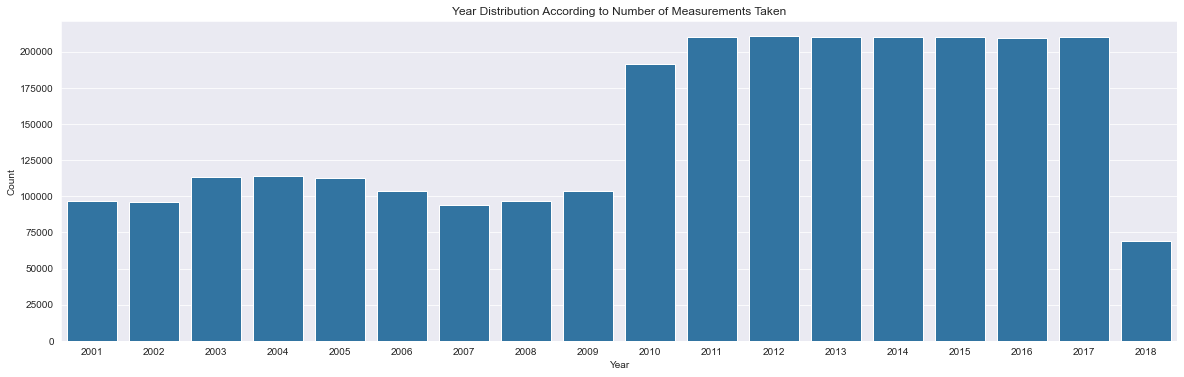

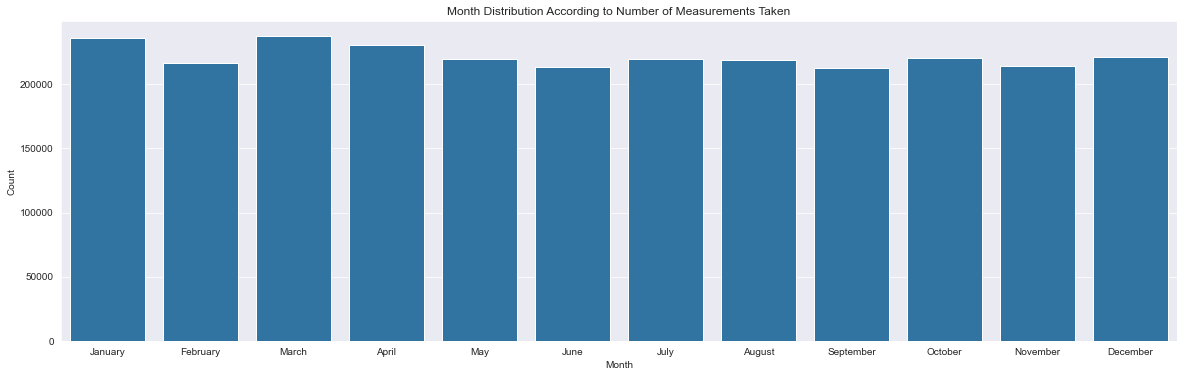

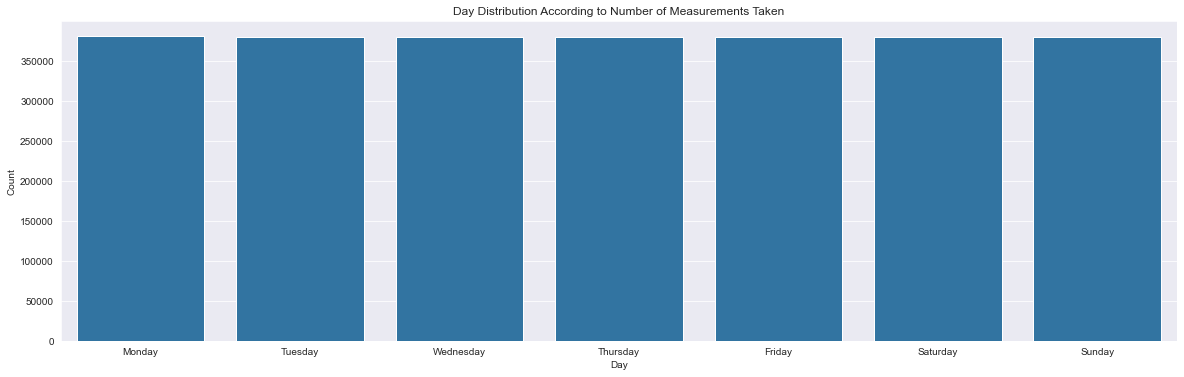

In [68]:
# iterataing through a list of categorical variabale for plotting.

cat_list = ['year', 'month', 'day']
for cat_name in cat_list:
    plt.figure(figsize=(20, 20))
    sns.set_style('darkgrid')
    plt.subplot(3, 1, 1)
    count_plot(cat_name)

In [69]:
# let's get the value count of each year in a data frame
print(pd.DataFrame(Data['year'].value_counts()))

# let's get the percentage of each year's value count
print(pd.DataFrame(Data['year'].value_counts(normalize=True)*100))

        year
2012  210720
2017  210120
2015  210096
2014  210024
2011  209927
2013  209880
2016  209496
2010  191658
2004  113928
2003  113615
2005  112825
2009  103722
2006  103442
2008   96432
2001   96397
2002   96359
2007   94223
2018   69120
          year
2012  7.915900
2017  7.893361
2015  7.892459
2014  7.889754
2011  7.886111
2013  7.884345
2016  7.869920
2010  7.199818
2004  4.279815
2003  4.268057
2005  4.238380
2009  3.896417
2006  3.885899
2008  3.622561
2001  3.621246
2002  3.619819
2007  3.539578
2018  2.596560


In [70]:
# let's get the value count of each month in a data frame
print(pd.DataFrame(Data['month'].value_counts()))

# let's get the percentage of each month's value count
print(pd.DataFrame(Data['month'].value_counts(normalize=True)*100))

            month
March      237504
January    235951
April      230400
December   221565
October    220319
May        220152
July       219701
August     219260
February   216574
November   214366
June       213719
September  212473
              month
March      8.922067
January    8.863727
April      8.655199
December   8.323303
October    8.276496
May        8.270223
July       8.253280
August     8.236714
February   8.135811
November   8.052866
June       8.028561
September  7.981753


In [71]:
# let's get the value count of the unique days in a data frame
print(pd.DataFrame(Data['day'].value_counts()))

# let's get the percentage of each day's value count
print(pd.DataFrame(Data['day'].value_counts(normalize=True)*100))

              day
Monday     380787
Thursday   380442
Friday     380402
Wednesday  380297
Tuesday    380165
Saturday   380124
Sunday     379767
                 day
Monday     14.304631
Thursday   14.291671
Friday     14.290169
Wednesday  14.286224
Tuesday    14.281265
Saturday   14.279725
Sunday     14.266314


As observed from our charts which were backed up by the descriptive statistics, 2012 had the highest record of measurement of gases while 2018 had the least record of gas measurements. This is because 2018 had only 4 months recorded before the data was gathered for analysis.

March had the highest record of gas measurements while September was the month with the least record of gas measurements.

More gas measurements happened on a Monday, with other days having fairly equal number of gas or elements measurements.

## Bivariate Analysis

****Let's first use a plot matrix to display the relationship between all the numerical variables of interest.****

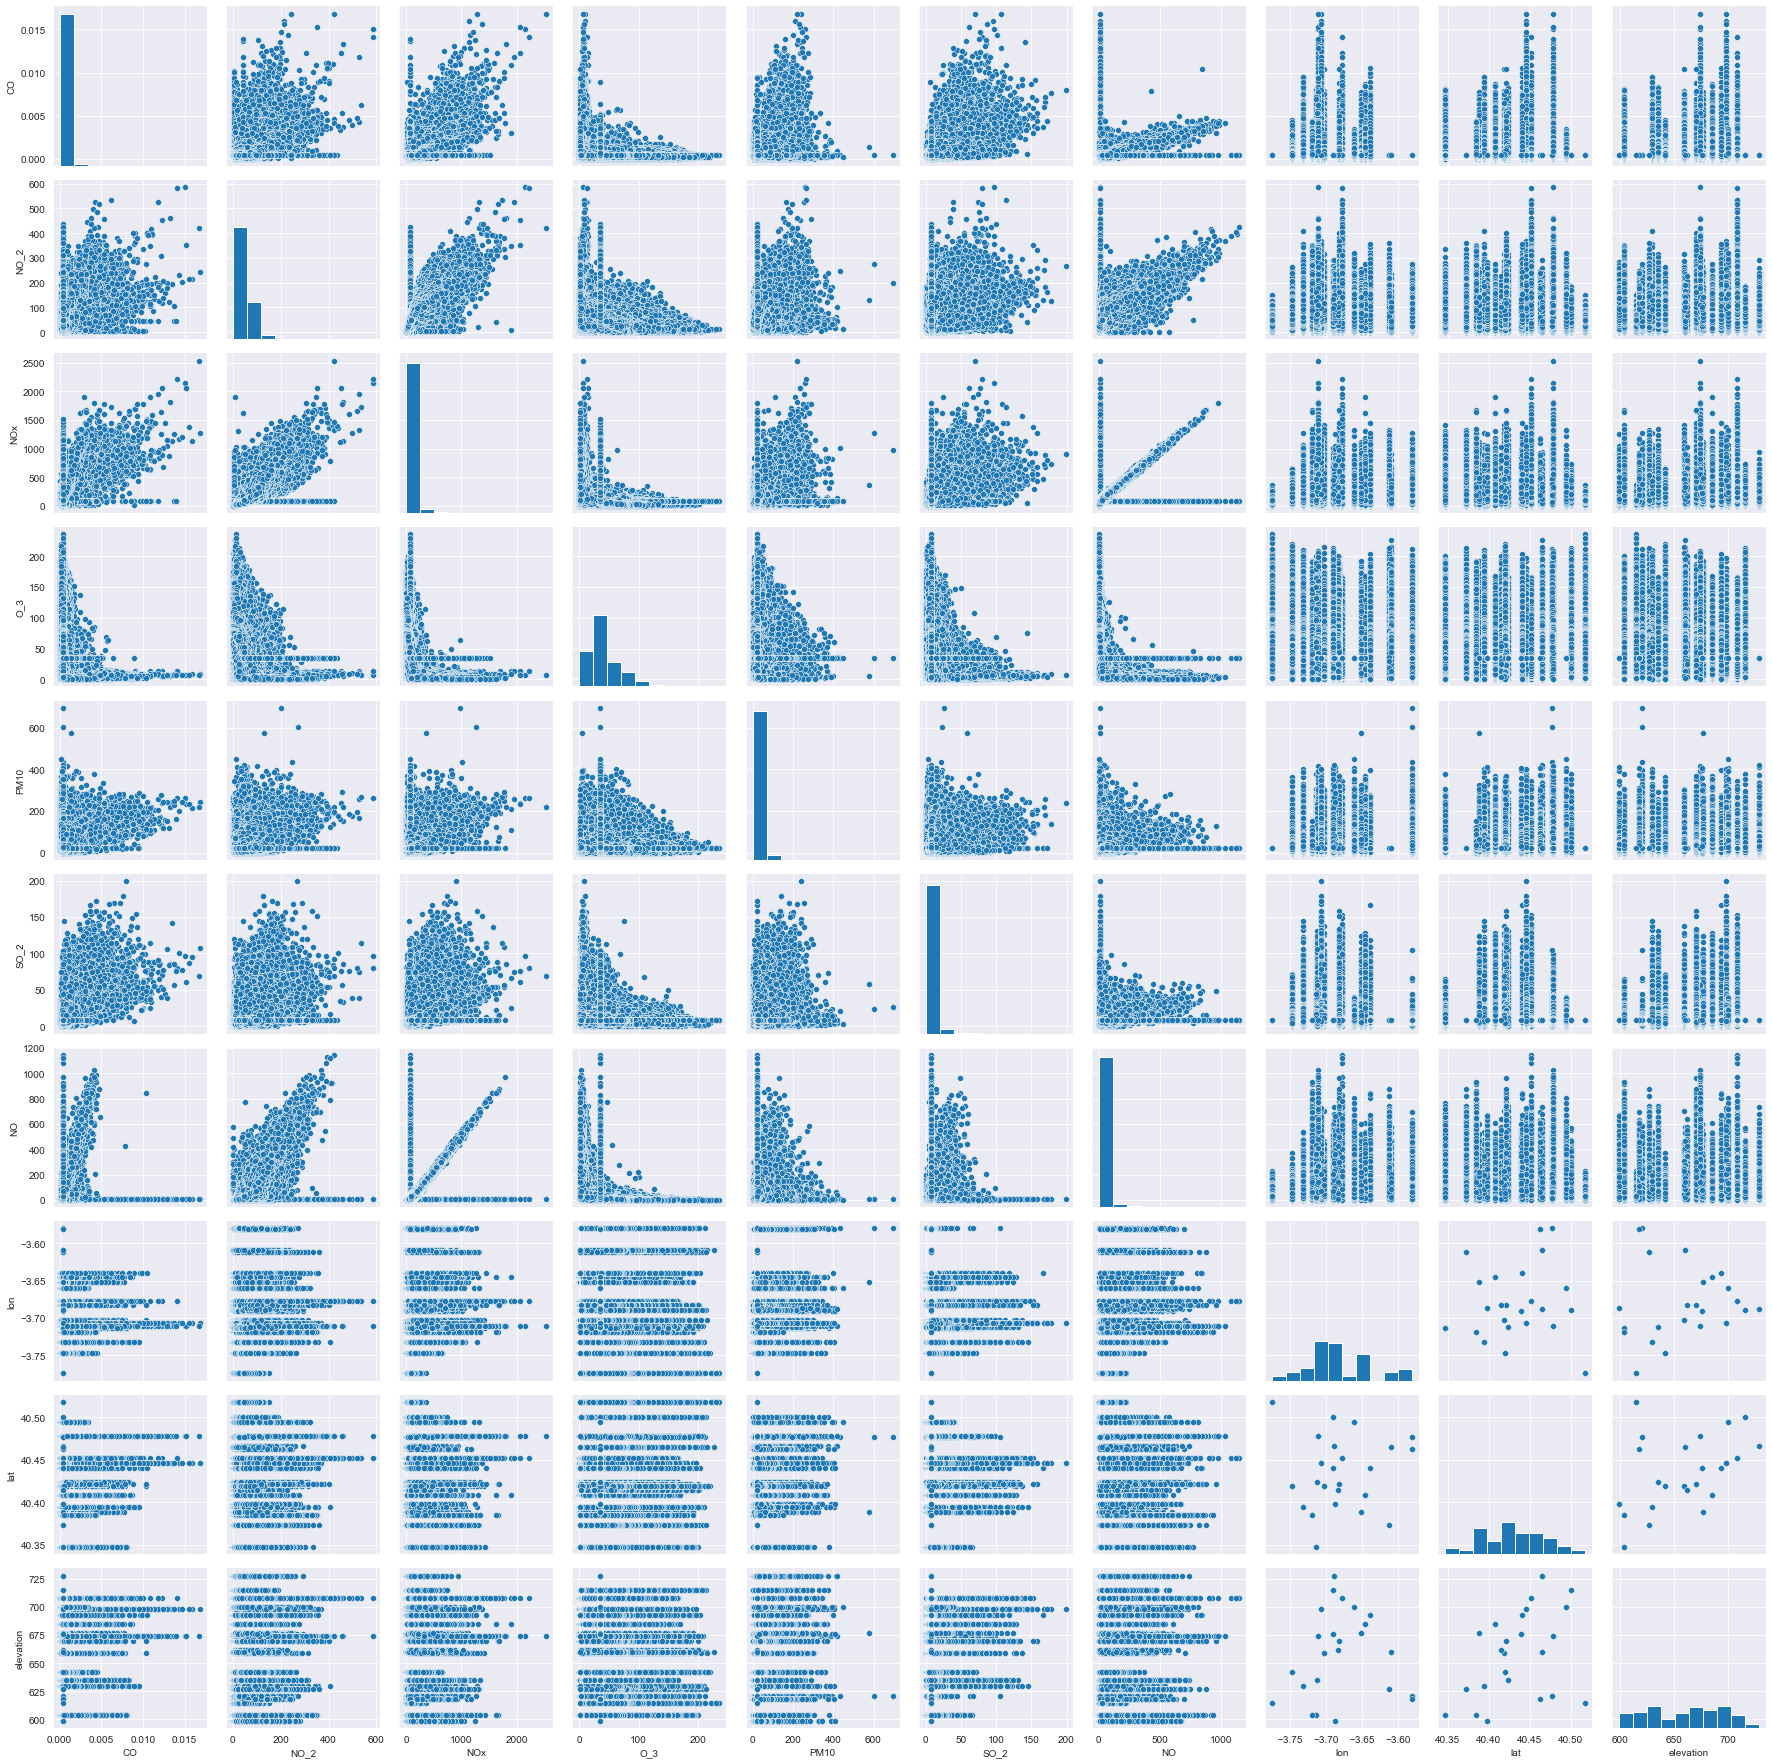

In [72]:
num_variables = ['CO', 'NO_2', 'NOx', 'O_3', 'PM10', 'SO_2', 'NO', 'lon', 'lat', 'elevation']

g = sns.PairGrid(data=Data, vars=num_variables)
g = g.map_offdiag(sns.scatterplot)
g.map_diag(plt.hist);

As we can see, there isn't a significant relationship between latitude (lat), longitude (lon), and elevation and any of the gases.

In [73]:
num_variables = ['CO', 'NO_2', 'NOx', 'O_3', 'PM10', 'SO_2', 'NO', 'lon', 'lat', 'elevation']

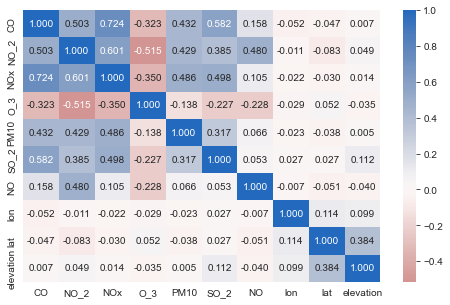

In [74]:
# correlation plot
plt.figure(figsize = [8, 5])
sns.heatmap(Data[num_variables].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show();

We could observe that there a strong linear correlation between CO and NO_2, NOx, SO_2.

There also exists a strong linear correlation between NOx and NO_2, NOx and PM10, NOx and SO_2, NO and NO_2, **with CO and NOx having high number of correlations with other elements.**

****More importantly****, there is no direct linear relationship or correlation between the levels of the individual gas pollutants and the longitude, latitude, and elevation of the stations.

___Let's closely take a look at these strong linear correlations between CO, NOx and other elements/gases.___

In [75]:
def Relationship(num_var1, num_var2):
    sns.set(rc={'figure.figsize':(7, 7)})
    sns.regplot(data=Data, x=num_var1, y=num_var2, x_jitter=0.3, fit_reg=False, scatter_kws={'alpha':0.3})
    plt.title('{}'. format(num_var1 + ' versus '+ num_var2))
    
    if num_var1 == 'CO':
        plt.xlabel('{} (μg/m³)'.format(num_var1))
    elif num_var1 == 'SO_2':
        plt.xlabel('{} (μg/m³)'.format(num_var1))
    elif num_var1 == 'NOx':
        plt.xlabel('{} (μg/m³)'.format(num_var1))
    elif num_var1 == 'O_3':
        plt.xlabel('{} (μg/m³)'.format(num_var1))
    elif num_var1 == 'PM10':
        plt.xlabel('{} (μg/m³)'.format(num_var1))
    elif num_var1 == 'NO_2':
        plt.xlabel('{} (μg/m³)'.format(num_var1))
    else:
        plt.xlabel('{} (μg/m³)'.format(num_var1))
        
    if num_var2 == 'CO':
        plt.ylabel('{} (μg/m³)'.format(num_var2))
    elif num_var2 == 'NO_2':
        plt.ylabel('{} (μg/m³)'.format(num_var2))
    elif num_var2 == 'NOx':
        plt.ylabel('{} (μg/m³)'.format(num_var2))
    elif num_var2 == 'O_3':
        plt.ylabel('{} (μg/m³)'.format(num_var2))
    elif num_var2 == 'PM10':
        plt.ylabel('{} (μg/m³)'.format(num_var2))
    elif num_var2 == 'SO_2':
        plt.ylabel('{} (μg/m³)'.format(num_var2))
    else:
        plt.ylabel('{} (μg/m³)'.format(num_var2))

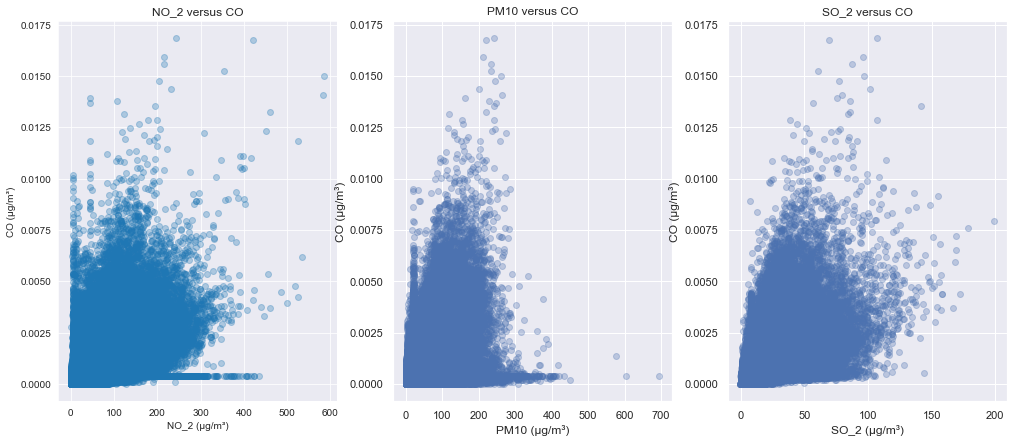

In [76]:
plt.figure(figsize=[17, 7])
plt.subplot(1, 3, 1)
Relationship('NO_2', 'CO');

plt.subplot(1, 3, 2)
Relationship('PM10', 'CO');

plt.subplot(1, 3, 3)
Relationship('SO_2', 'CO');

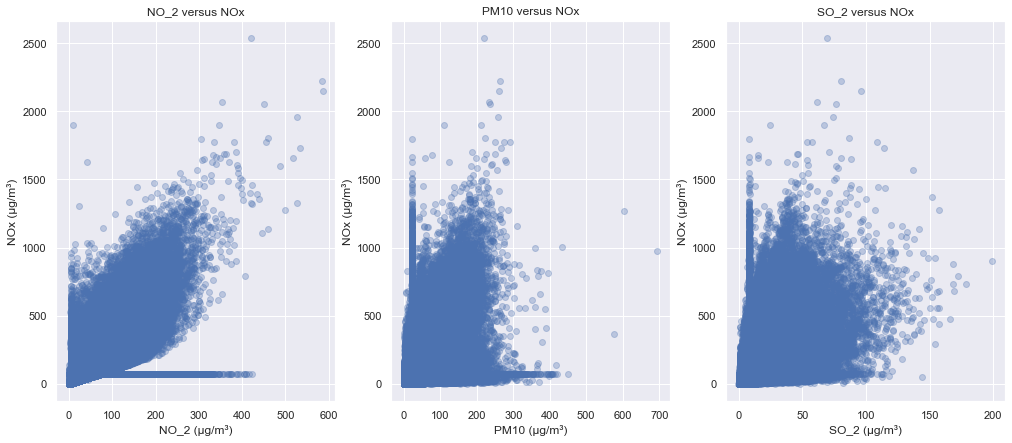

In [77]:
plt.figure(figsize=[17, 7])
plt.subplot(1, 3, 1)
Relationship('NO_2', 'NOx');

plt.subplot(1, 3, 2)
Relationship('PM10', 'NOx');

plt.subplot(1, 3, 3)
Relationship('SO_2', 'NOx');

Once again, it's observed the strong correlation between CO, NOx and these other elements they are compared with. This is probably because they all have one source, which is the fossil fuels used in cars, trucks, trains, and airplanes.

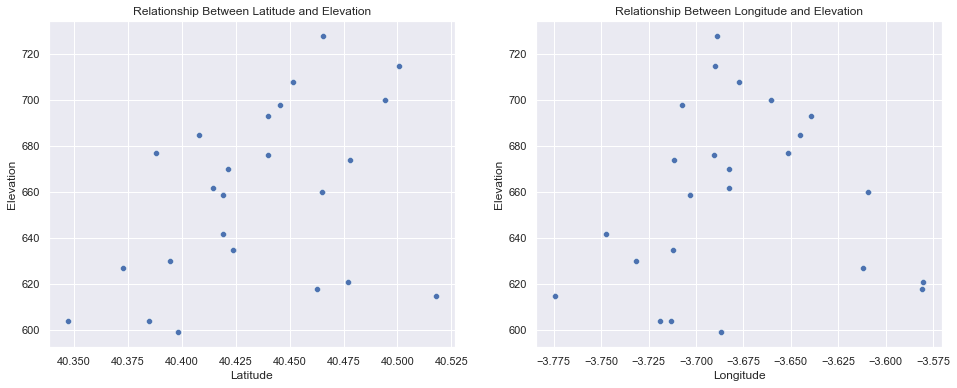

In [78]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.scatterplot(Data.lat, Data.elevation)
plt.xlabel('Latitude')
plt.ylabel('Elevation')
plt.title('Relationship Between Latitude and Elevation')
plt.subplot(1,2,2)
sns.scatterplot(Data.lon, Data.elevation)
plt.xlabel('Longitude')
plt.ylabel('Elevation')
plt.title('Relationship Between Longitude and Elevation');

We can observe that latitude has a weak postive correlation with elevation, more than longitude did.

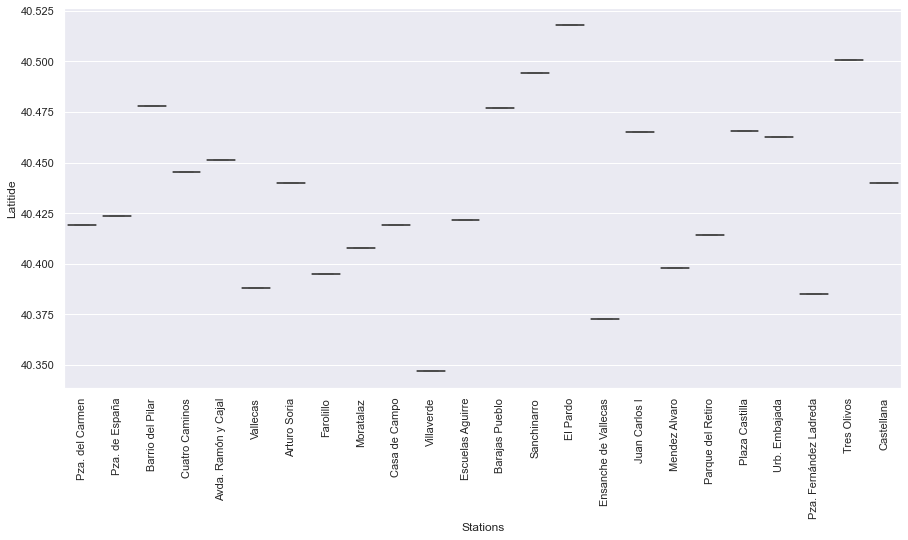

In [79]:
plt.figure(figsize=[15, 7])
base_color = sns.color_palette()[0]
sns.boxplot(data=Data, x='name', y='lat', color=base_color)
plt.xticks(rotation=90);
plt.xlabel('Stations')
plt.ylabel('Latitide');

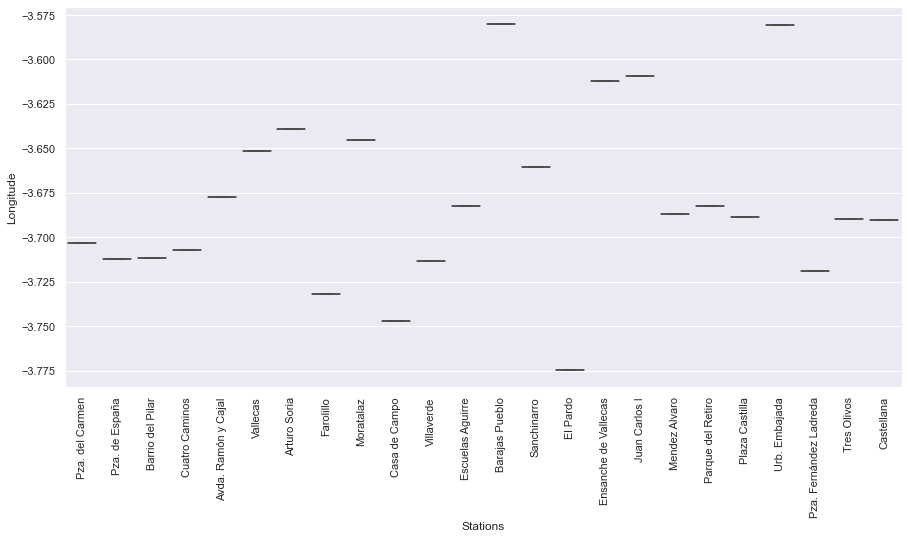

In [80]:
plt.figure(figsize=[15, 7])
base_color = sns.color_palette()[0]
sns.boxplot(data=Data, x='name', y='lon', color=base_color)
plt.xticks(rotation=90);
plt.xlabel('Stations')
plt.ylabel('Longitude');

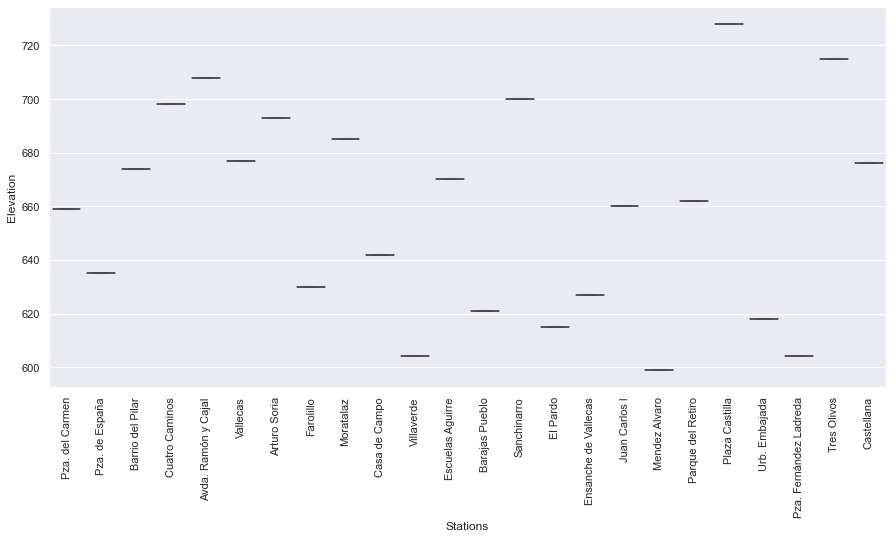

In [81]:
plt.figure(figsize=[15, 7])
base_color = sns.color_palette()[0]
sns.boxplot(data=Data, x='name', y='elevation', color=base_color)
plt.xticks(rotation=90);
plt.xlabel('Stations')
plt.ylabel('Elevation');

Since we've previously observed that their exists a weak positive relationship between elevation and latitude, we could see that the stations which have low elevation also have a low latitude, while the stations which have a high latitude has a high elavation.

So **we know that elevation means the height of a place above the sea level**, and research has proven that if a place's elevation is high above the sea level, the place is likely to measure little amount of these pollutant gases.

So, having this in mind, we will confirm these in the multivariate explorations. 

# Multivariate Analysis

In [82]:
# # We can use this code if we want to visualize the measurement of CO over the years without including 
# # the station names

'''With this body of code, this would have been done in the bivariate analysis section, but we left it to visualize it in other 
to include the names of the stations as `hue`.
'''
# plt.figure(figsize = (15, 7))
# plt.plot(Data.year, Data.CO)
# plt.title('Measurements of CO over the years')
# plt.xticks(rotation=30, ha='right');
# plt.xlabel('Date')
# plt.ylabel('CO (μg/m³)');

'With this body of code, this would have been done in the bivariate analysis section, but we left it to visualize it in other \nto include the names of the stations as `hue`.\n'

In [83]:
# In order to visualize the measurement distribution of CO and NOx over the years, we need to split the main dataframe 
# into different dataframes because visualizing everything at once would be clumsy.

# let's split the dataset into different sets to aid easy visualization

df1 = Data[Data['name'].isin(['Arturo Soria', 'Avda. Ramón y Cajal', 'Barajas Pueblo', 'Barrio del Pilar',
                                  'Casa de Campo', 'Castellana'])]

df2 = Data[Data['name'].isin(['Cuatro Caminos', 'El Pardo', 'Ensanche de Vallecas', 'Escuelas Aguirre', 'Farolillo',
                                  'Juan Carlos I'])]
                                 
df3 = Data[Data['name'].isin(['Mendez Alvaro', 'Moratalaz', 'Parque del Retiro', 'Plaza Castilla', 'Pza. Fernández Ladreda',
                                  'Pza. de España'])]
                                  
df4 = Data[Data['name'].isin(['Pza. del Carmen', 'Sanchinarro', 'Tres Olivos', 'Urb. Embajada', 'Vallecas',
                                       'Villaverde'])]


We will focus on the two gaseosus pollutants which are `CO` and `NOx` because we have seen that other elements are likely to be seen when these elements occur.

So the logic is if we governement of Madrid is able to tacke the concentration of these two gases, other gases are likely to be tackled too, since they all come from the same sources.

We good? Okay, let's move on.

**FOR DF1 --- checking for CO**

**What was the measurement distribution of CO across the different stations from the year 2001 to 2018 in df1?**

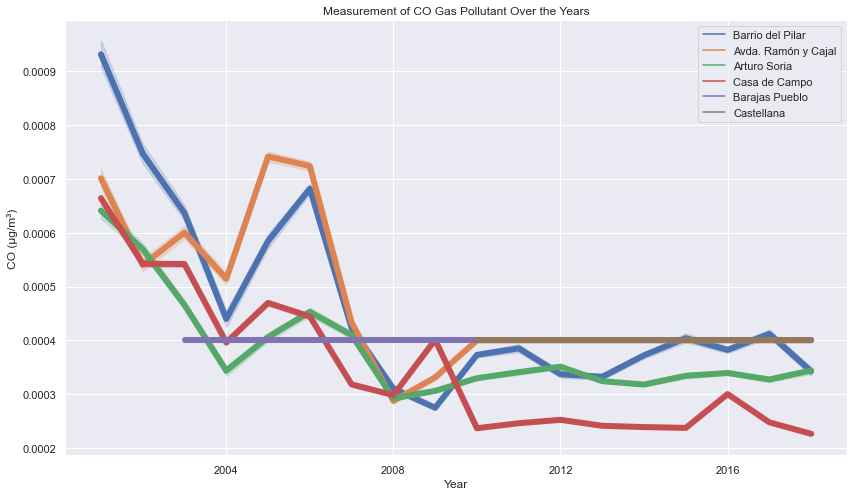

In [84]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize': (14,8)})

ax = sns.lineplot(data=df1, x='year', y='CO',
                  hue='name', lw=6)

ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Measurement of CO Gas Pollutant Over the Years')
plt.ylabel('CO (μg/m³)')
plt.xlabel('Year');

Measurement of CO decreased over the years for these stations, but remained constant at 0.0004 for Barajas Pueblo (from 2003 to 2010) and Castellana (2010 to 2018).

**Between the years from 2001 to 20018, which months recorded the highest measurement of CO using df1?**

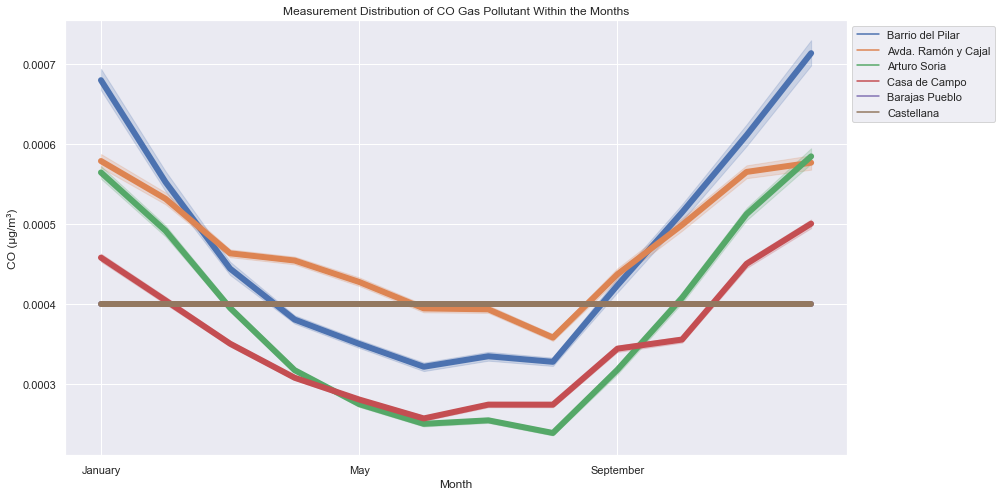

In [85]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize': (14,8)})

ax = sns.lineplot(data=df1, x='month', y='CO',
                  hue='name', lw=6)

ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Measurement Distribution of CO Gas Pollutant Within the Months')
plt.ylabel('CO (μg/m³)')
plt.xlabel('Month');

We observe that CO pollutant occured mostly from August to January and decreases sharply for most of the stations from January to August.

**FOR DF2 --- checking for CO**

**what was the measurement distribution of CO across the different stations from the year 2001 to 2018 in df2?**

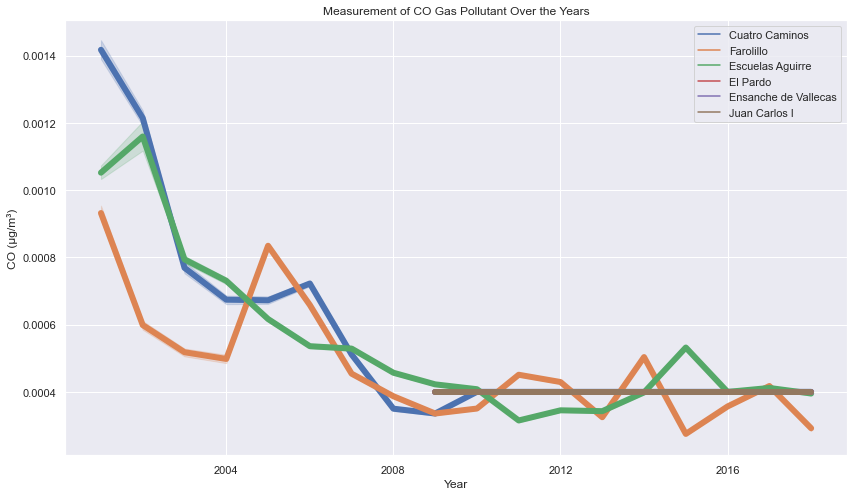

In [86]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize': (14,8)})

ax = sns.lineplot(data=df2, x='year', y='CO',
                  hue='name', lw=6)

ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Measurement of CO Gas Pollutant Over the Years')
plt.ylabel('CO (μg/m³)')
plt.xlabel('Year');

Measurement of CO decreased over the years for these stations, except for Juan Carlos which remained constant at 0.004, from 2009 till 2018

**Between the years from 2001 to 20018, which months recorded the highest measurement of CO using df2?**

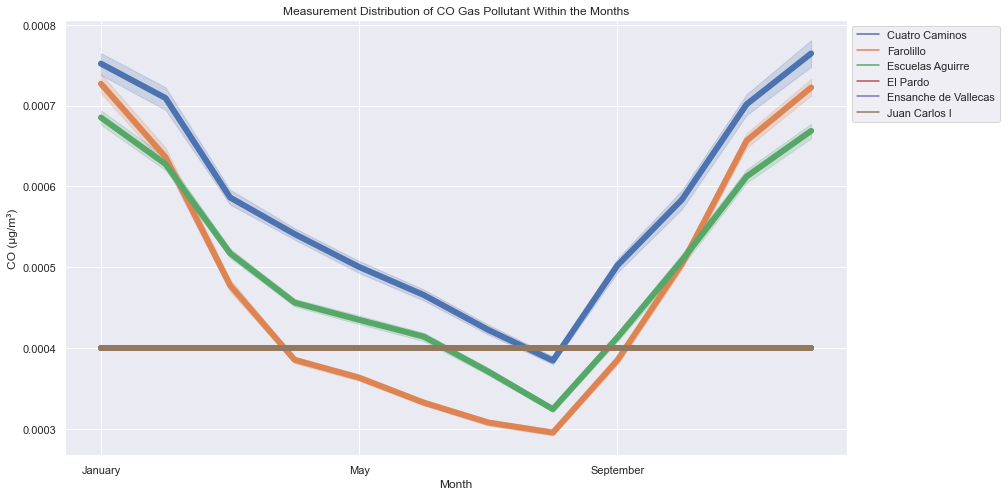

In [87]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize': (14,8)})

ax = sns.lineplot(data=df2, x='month', y='CO',
                  hue='name', lw=6)

ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Measurement Distribution of CO Gas Pollutant Within the Months')
plt.ylabel('CO (μg/m³)')
plt.xlabel('Month');

We observe that CO pollutant occured mostly from August to January and decreases sharply for most of the stations from January to August.

**FOR DF3 --- checking for CO**

**what was the measurement distribution of CO across the different stations from the year 2001 to 2018 in df3?**

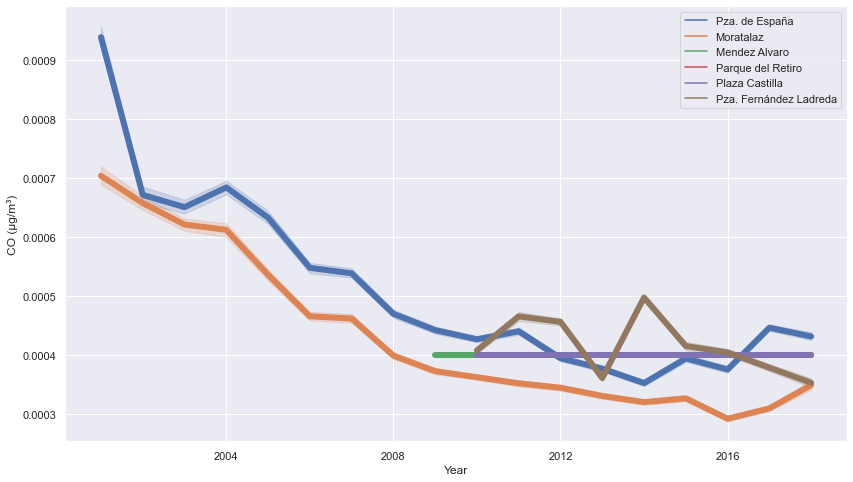

In [88]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize': (14,8)})

ax = sns.lineplot(data=df3, x='year', y='CO',
                  hue='name', lw=6)

ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('CO (μg/m³)')
plt.xlabel('Year');

Measurement of CO decreased over the years in these stations. Very little was recorded for Mendez Alvaro from 2009 to 2010 and then CO measurement remained constant in Plaza Castilla, from 2010 till 2018.

**Between the years from 2001 to 20018, which months recorded the highest measurement of CO using df3?**

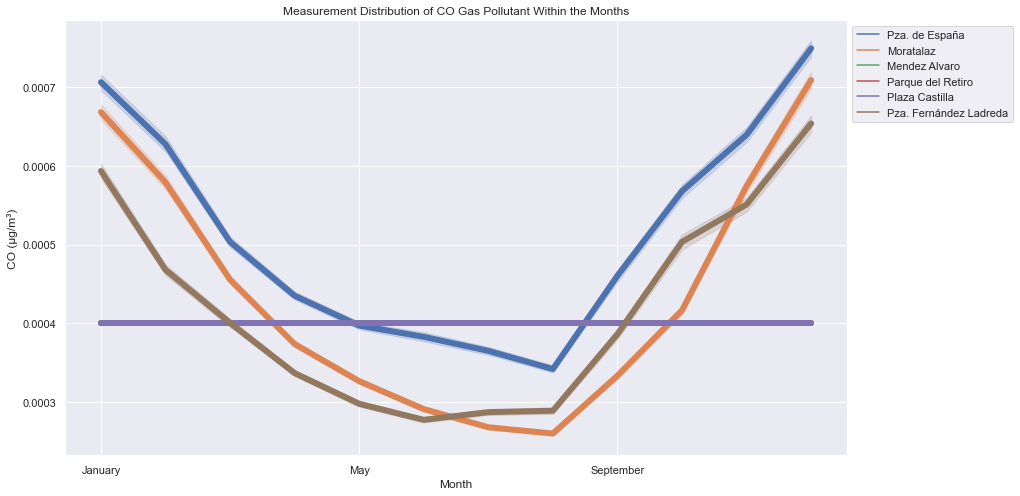

In [89]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize': (14,8)})

ax = sns.lineplot(data=df3, x='month', y='CO',
                  hue='name', lw=6)

ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Measurement Distribution of CO Gas Pollutant Within the Months')
plt.ylabel('CO (μg/m³)')
plt.xlabel('Month');

We observe that CO pollutant occured mostly from August to January and decreases sharply for most of the stations from January to August.

**FOR DF4 --- checking for CO**

**what was the measurement distribution of CO across the different stations from the year 2001 to 2018 in df4?**

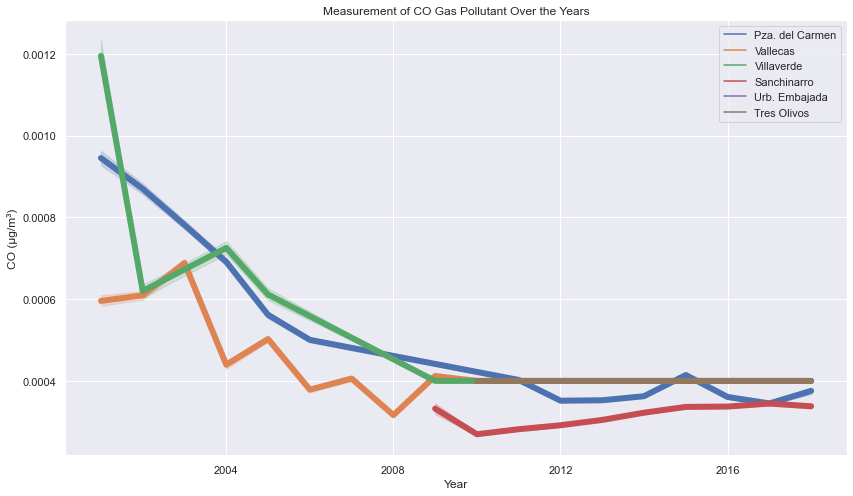

In [90]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize': (14,8)})

ax = sns.lineplot(data=df4, x='year', y='CO',
                  hue='name', lw=6)

ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Measurement of CO Gas Pollutant Over the Years')
plt.ylabel('CO (μg/m³)')
plt.xlabel('Year');

Measurement of CO decreased over the years in these stations and remained constatant from Tres Olivos from 2010 to 2018

**Between the years from 2001 to 20018, which months recorded the highest measurement of CO using df4?**

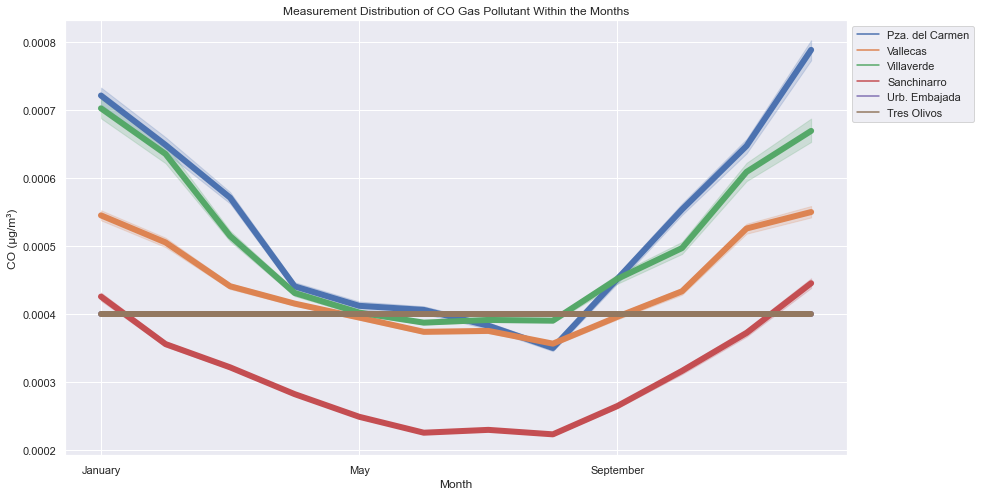

In [91]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize': (14,8)})

ax = sns.lineplot(data=df4, x='month', y='CO',
                  hue='name', lw=6)

ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Measurement Distribution of CO Gas Pollutant Within the Months')
plt.ylabel('CO (μg/m³)')
plt.xlabel('Month');

We observe that CO pollutant occured mostly from August to January and decreases sharply for most of the stations from January to August.

**FOR DF1 --- checking for NOx**

**what was the measurement distribution of NOx across the different stations from the year 2001 to 2018 in df1?**

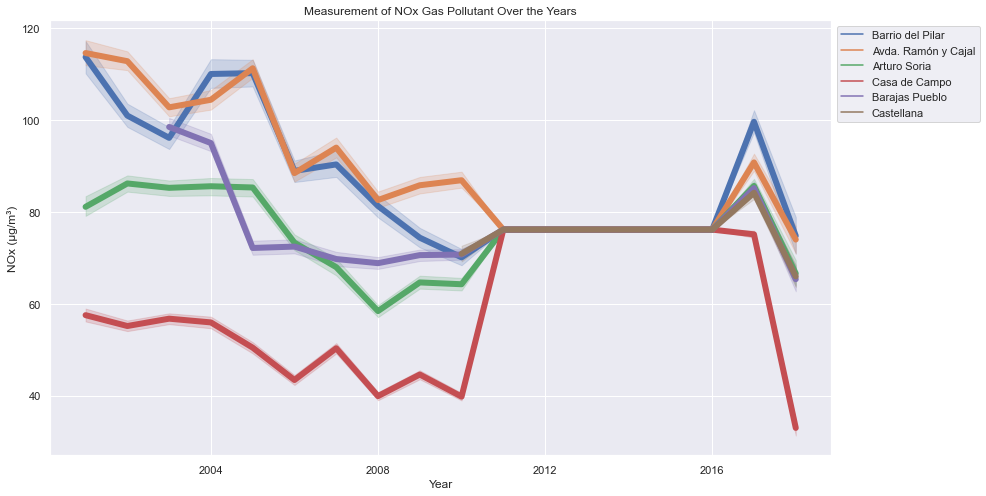

In [92]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize': (14,8)})

ax = sns.lineplot(data=df1, x='year', y='NOx',
                  hue='name', lw=6)

ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Measurement of NOx Gas Pollutant Over the Years')
plt.ylabel('NOx (μg/m³)')
plt.xlabel('Year');

Here, we can observe that the NOx measurement decreased from 2001 for five of the stations and ceased in 2011. while it became constant fo Castella only from 2011 to 2016. Then there was a sharp increase in measurements in most of the stations in 2016 before they decreased again in 2017.

**Between the years from 2001 to 20018, which months recorded the highest measurement of NOx using df1?**

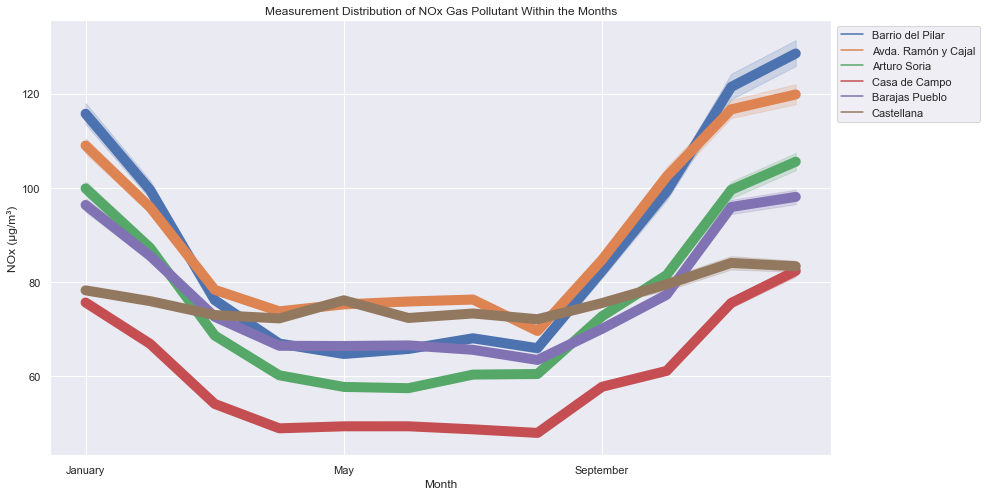

In [93]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize': (14,8)})

ax = sns.lineplot(data=df1, x='month', y='NOx',
                  hue='name', lw=10) #palette='coolwarm'
                  #legend='full', lw=3)

ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Measurement Distribution of NOx Gas Pollutant Within the Months')
plt.ylabel('NOx (μg/m³)')
plt.xlabel('Month');

We observe that NOx pollutant occured mostly from August to January and decreases sharply for most of the stations from January to August.

**FOR DF2 --- checking for NOx**

**what was the measurement distribution of NOx across the different stations from the year 2001 to 2018 in df2?**

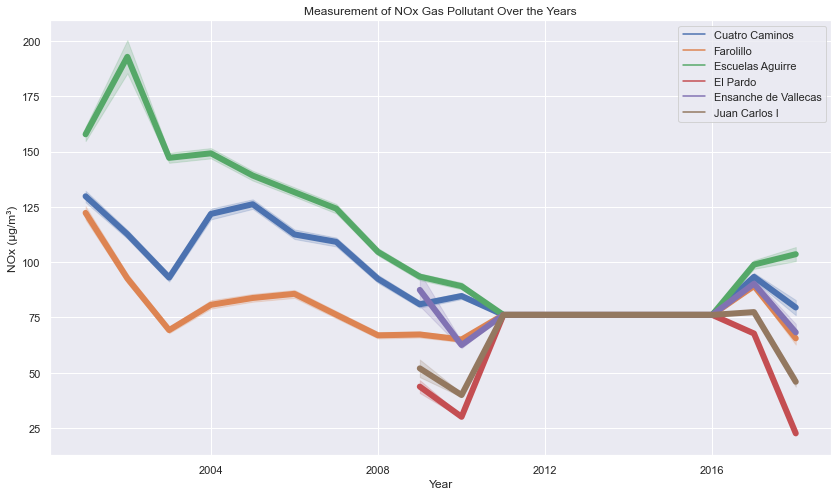

In [94]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize': (14,8)})

ax = sns.lineplot(data=df2, x='year', y='NOx',
                  hue='name', lw=6)

ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Measurement of NOx Gas Pollutant Over the Years')
plt.ylabel('NOx (μg/m³)')
plt.xlabel('Year');

We could see the NOx measurement decreased from 2001 for 3 of the stations, while for the other 3, the NOx measurement just started in 2009, then became constant for all the stations from 2011 till 2016, where it increased again for most of the stations before dropping again in 2017.

**Between the years from 2001 to 20018, which months recorded the highest measurement of NOx using df2?**

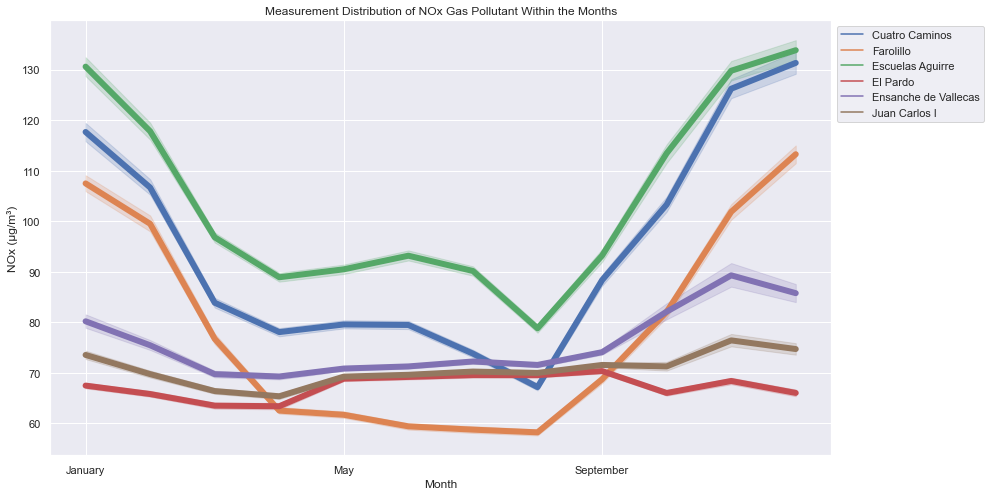

In [95]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize': (14,8)})

ax = sns.lineplot(data=df2, x='month', y='NOx',
                  hue='name', lw=6)


ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Measurement Distribution of NOx Gas Pollutant Within the Months')
plt.ylabel('NOx (μg/m³)')
plt.xlabel('Month');

We observe that NOx pollutant occured mostly from August to January and decreases sharply for most of the stations from January to August.

**FOR DF3 --- checking for NOx**

**what was the measurement distribution of NOx across the different stations from the year 2001 to 2018 in df3?**

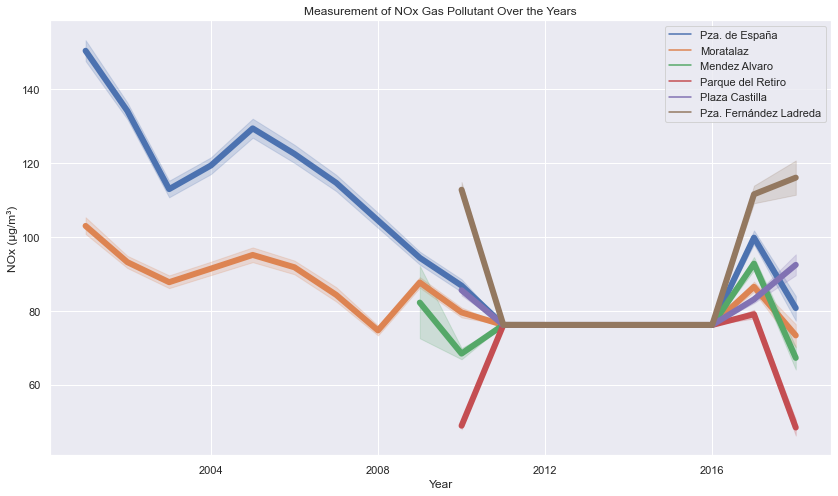

In [96]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize': (14,8)})

ax = sns.lineplot(data=df3, x='year', y='NOx',
                  hue='name', lw=6)

ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Measurement of NOx Gas Pollutant Over the Years')
plt.ylabel('NOx (μg/m³)')
plt.xlabel('Year');

We could see the NOx measurement decreased from 2001 for 2 of the stations, while for the other 4, the NOx measurement just started roughly around 2009 and 2010, then became constant for all the stations from 2011 till 2016, where it increased again for most of the stations before dropping again in 2017.

**Between the years from 2001 to 20018, which months recorded the highest measurement of NOx using df3?**

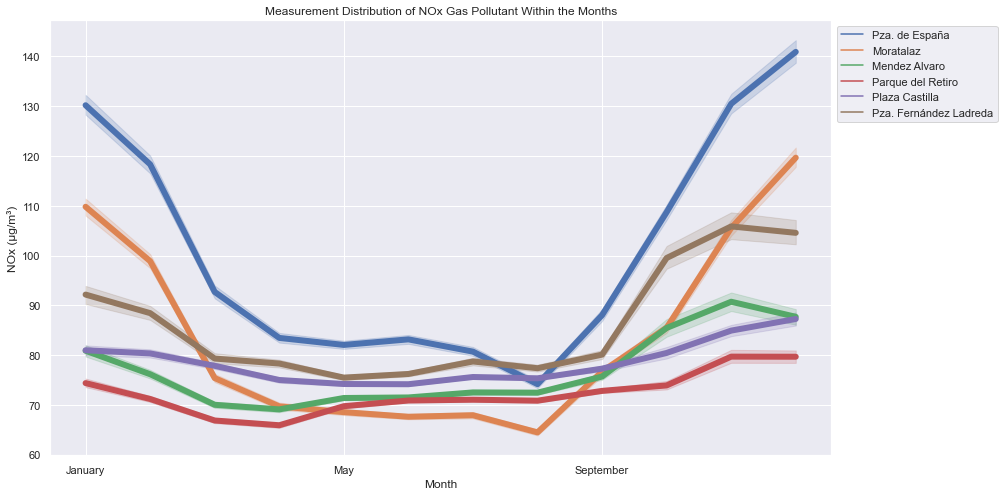

In [97]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize': (14,8)})

ax = sns.lineplot(data=df3, x='month', y='NOx',
                  hue='name', lw=6)

ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Measurement Distribution of NOx Gas Pollutant Within the Months')
plt.ylabel('NOx (μg/m³)')
plt.xlabel('Month');

We observe that NOx pollutant occured mostly from August to January and decreases sharply for most of the stations from January to August.

**FOR DF4 --- checking for NOx**

**What was the measurement distribution of NOx across the different stations from the year 2001 to 2018 in df4?**

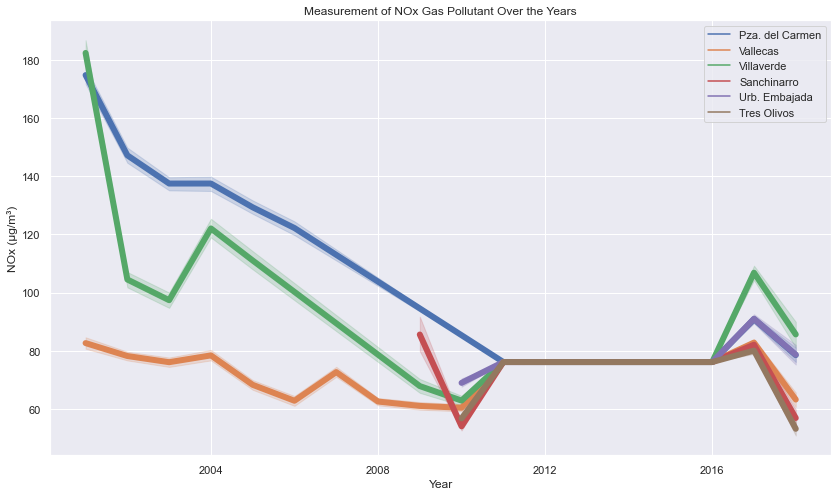

In [98]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize': (14,8)})

ax = sns.lineplot(data=df4, x='year', y='NOx',
                  hue='name', lw=6)

ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Measurement of NOx Gas Pollutant Over the Years')
plt.ylabel('NOx (μg/m³)')
plt.xlabel('Year');

We could see the NOx measurement decreased from 2001 for 3 of the stations, while for the other 3, the NOx measurement just started between 2009 and 2010, then became constant for all the stations from 2011 till 2016, where it increased again for most of the stations before dropping again in 2017.

**Between the years from 2001 to 20018, which months recorded the highest measurement of NOx using df4?**

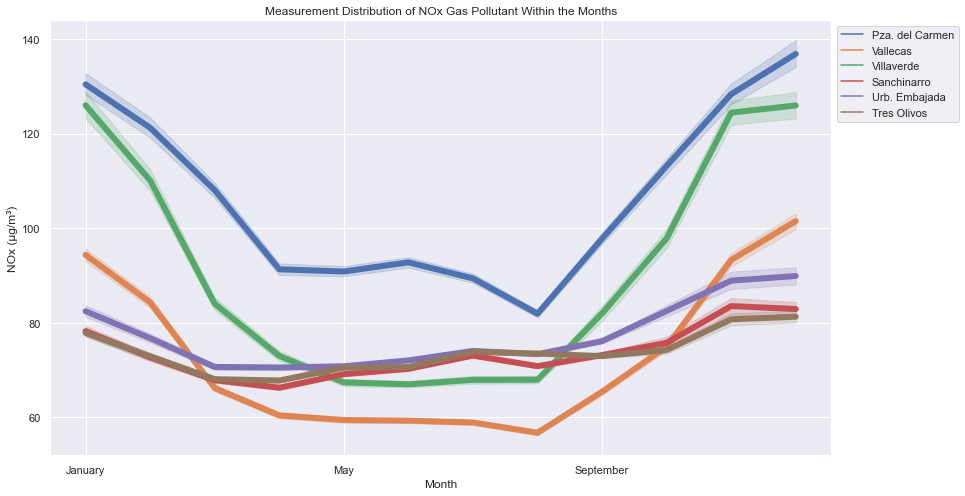

In [99]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize': (14,8)})

ax = sns.lineplot(data=df4, x='month', y='NOx',
                  hue='name', lw=6)

ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Measurement Distribution of NOx Gas Pollutant Within the Months')
plt.ylabel('NOx (μg/m³)')
plt.xlabel('Month');

We observe that NOx pollutant occured mostly from August to January and decreases sharply for most of the stations from January to August.

In [100]:
# save the cleaned dataset to a csv file
Data.to_csv('cleaned_data.csv', index = False)

# CONCLUSION:


 - There is a negative and postive trend of CO nad NOX pollutants measurement in most of the stations as it concerns the measurement variations within the different months in a year. The measurement decreases from January and becomes constant from March or April up unitil August where it increases till September the next year.
    

  During winter season the minimum temperatures in this most cities drop down and thus increasing the level of the pollutants as the low temperature reduces vertical mixing and thus lowers the mixing layer height thereby trapping the pollutants in the atmosphere. That's why these gases occur most in the dry or winter months.
 
 
 - It was observed that CO measurement decreased from 2001 t0 2018 in most of the stations, and was only observed more in stations with low elevation. Example - Mendez Alvaro, Farolillo.
 
 
 - It was observed that NO measurent for most stations decreased from 2001 for some of the stations, and became contant from 2011 till 2016 for most of the stations, before increasing and dropping again in 2017.
 
 So it's generally negative secular trend with random variations in the most of the stations.
 
 
 - NO was also observed at stations with mid to low elevation. Example - Pza. del Carmen, Pza. de España.

# Limitations

 - This dataset was only from 2001 to 2018 and the datapoints that has been collected over the years from 2019 till present might be different from the dataset we worked with.
 
 
 - At some point, there was a ceasation of NOx gas pollutant measurement for most of the stations. This makes the data not to be totally complete for the trend analysis.
